In [1]:
# Parkinsonics Manuscript Level Figures Output
# According to Bela's feedback on manuscript on 2.25.21
# Kevin Li
# 2.25.21

import pandas as pd
import numpy as np
import statistics as stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.stats.multitest as smt
import statsmodels.api as sm
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
#import missingno as msno
import os

In [2]:
# Change some mpl defaults for submission quality figs
plt.style.use('seaborn-darkgrid')
plt.rcParams.update({'font.size': 12})
plt.rcParams["font.family"] = "sans"

In [3]:
# Define color palette for later plots
cwheel=['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c',
        '#fdbf6f', '#ff7f00', '#cab2d6', '#6a3d9a', '#ffff99', '#b15928',
        '#8dd3c7', '#ffffb3', '#bebada', '#fb8072', '#80b1d3', '#fdb462', 
        '#b3de69', '#fccde5', '#d9d9d9', '#bc80bd', '#ccebc5', '#ffed6f']

Run and capture everything from EDA notebook and UPDRS notebook

In [4]:
%%capture
%run Parkinsonics_EDA_V3.0.ipynb

# Import all the variables and sliced dataframes from EDA notebook
# (Comment last so that capture will work)

In [5]:
%%capture
%run UPDRS_AnalysesV2.0.ipynb

# Import everyth from Bela's notebook for fig 2

# Manuscript Figures
## Figure 2 -  Spaghetti Plots

2a - Cookie Theft avg dB, min dB, MDS-UPDRS III

2b - Rainbow min dB All, S, D

2c - Cookie min dB All, S, D

2d - MDS-UPDRS All, S, D

Define some varaibles, obtain the groups to plot

In [6]:
timepoints=['Week 0', 'Week 6', 'Week 12', 'Week 18', 'Week 24', 'Week 30']
a=cookie_avgdb
b=cookie_mindb
c=mdf

a_tot=a.iloc[:, 2:8]
b_tot=b.iloc[:, 2:8]
c_tot=c.iloc[:, 1:7]

a_tot_avg=a_tot.mean(axis=0)
b_tot_avg=b_tot.mean(axis=0)
c_tot_avg=c_tot.mean(axis=0)

## 2A - Cookie Theft avg dB, min dB, MDS-UPDRS III

Create figure for the 3 subplots (cookie avg, min, mds-updrs III)

Label only bottom x-axis with timepoints (Bela prefers weeks)

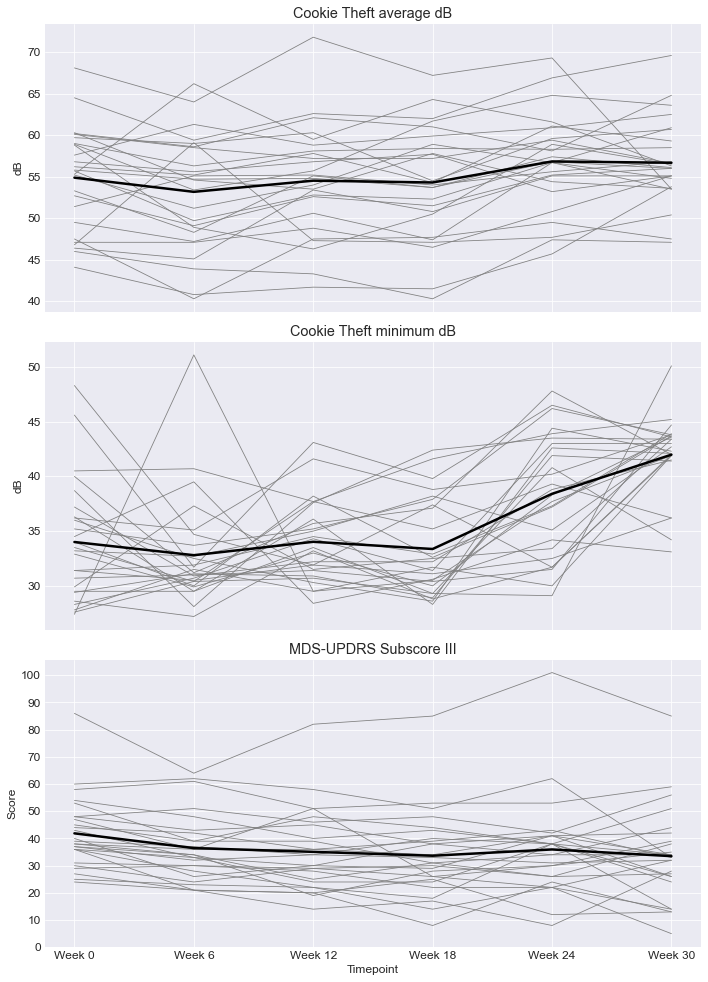

In [7]:
fig1, (ax1, ax2, ax3)=plt.subplots(3,1)
#fig1.suptitle('Improved measures from intention-to-treat analyses across all timepoints')

# Subplot 1: Cookie Avg dB
num=0
for patient in range(a_tot.shape[0]):
    plotA=a_tot.iloc[patient]
    #ax1.plot(timepoints, plotA, marker='', color=cwheel[num%len(cwheel)], linewidth=1)
    ax1.plot(timepoints, plotA, marker='', color='grey', linewidth=0.8)
    num+=1
# Plot mean of all patients for this measure
ax1.plot(timepoints, a_tot_avg, marker='', color='black', linewidth=2.5)

# Format
ax1.grid(True)
ax1.set_ylabel('dB')
ax1.set_xticklabels([])
fig1.set_size_inches(10,15)
ax1.title.set_text('Cookie Theft average dB')

# Subplot 2: Cookie Min dB
num=0
for patient in range(b_tot.shape[0]):
    plotB=b_tot.iloc[patient]
    #ax2.plot(timepoints, plotB, marker='', color=cwheel[num%len(cwheel)], linewidth=1)
    ax2.plot(timepoints, plotB, marker='', color='grey', linewidth=0.8)
    num+=1
# Plot mean of all patients for this measure
ax2.plot(timepoints, b_tot_avg, marker='', color='black', linewidth=2.5)

# Format
ax2.grid(True)
ax2.set_ylabel('dB')
ax2.set_xticklabels([])
fig1.set_size_inches(10,15)
ax2.title.set_text('Cookie Theft minimum dB')

# Subplot 3: MDS-UPDRS Subscore III
num=0
for patient in range(c_tot.shape[0]):
    plotC=c_tot.iloc[patient]
    #ax3.plot(timepoints, plotC, marker='', color=cwheel[num%len(cwheel)], linewidth=1)
    ax3.plot(timepoints, plotC, marker='', color='grey', linewidth=0.8)
    num+=1
# Plot mean of all patients for this measure
ax3.plot(timepoints, c_tot_avg, marker='', color='black', linewidth=2.5)

# Format
ax3.grid(True)
ax3.set_xlabel('Timepoint')
ax3.set_ylabel('Score')
plt.yticks(np.arange(0, 110, 10))
#ax3.set_xticklabels(['Week 0', 'Week 6', 'Week 12', 'Week 18', 'Week 24', 'Week 30'])
fig1.set_size_inches(10,15)
ax3.title.set_text('MDS-UPDRS Subscore III')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
currentfig=plt.gcf()

Save as .pdf, 150 dpi, then export to pdf

In [8]:
currentfig.savefig(r'C:\Users\kevin\Documents\JHU\Research\Parkinsonics\Manuscript\Figures\Fig2a_8232022.pdf', format="pdf", bbox_inches="tight", dpi=300)

## 2B - Rainbow min dB All, S, D

Define groups to plot

In [9]:
timepoints=['Week 0', 'Week 6', 'Week 12', 'Week 18', 'Week 24', 'Week 30']
a=rain_mindb

a_tot=a.iloc[:, 2:8]
b_tot=b.iloc[:, 2:8]
c_tot=c.iloc[:, 1:7]

a_tot_avg=a_tot.mean(axis=0)

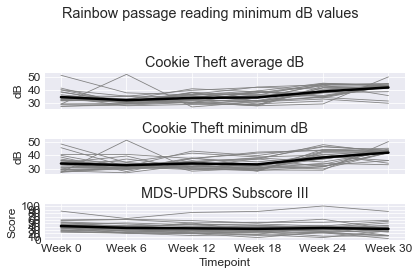

In [10]:
fig, (ax1, ax2, ax3)=plt.subplots(3,1)
fig.suptitle('Rainbow passage reading minimum dB values')

# Subplot 1: All
num=0
for patient in range(a_tot.shape[0]):
    plotA=a_tot.iloc[patient]
    #ax1.plot(timepoints, plotA, marker='', color=cwheel[num%len(cwheel)], linewidth=1)
    ax1.plot(timepoints, plotA, marker='', color='grey', linewidth=0.8)
    num+=1
# Plot mean of all patients for this measure
ax1.plot(timepoints, a_tot_avg, marker='', color='black', linewidth=2.5)

# Format
ax1.grid(True)
ax1.set_ylabel('dB')
ax1.set_xticklabels([])
fig1.set_size_inches(10,15)
ax1.title.set_text('Cookie Theft average dB')

# Subplot 2: Cookie Min dB
num=0
for patient in range(b_tot.shape[0]):
    plotB=b_tot.iloc[patient]
    #ax2.plot(timepoints, plotB, marker='', color=cwheel[num%len(cwheel)], linewidth=1)
    ax2.plot(timepoints, plotB, marker='', color='grey', linewidth=0.8)
    num+=1
# Plot mean of all patients for this measure
ax2.plot(timepoints, b_tot_avg, marker='', color='black', linewidth=2.5)

# Format
ax2.grid(True)
ax2.set_ylabel('dB')
ax2.set_xticklabels([])
fig1.set_size_inches(10,15)
ax2.title.set_text('Cookie Theft minimum dB')

# Subplot 3: MDS-UPDRS Subscore III
num=0
for patient in range(c_tot.shape[0]):
    plotC=c_tot.iloc[patient]
    #ax3.plot(timepoints, plotC, marker='', color=cwheel[num%len(cwheel)], linewidth=1)
    ax3.plot(timepoints, plotC, marker='', color='grey', linewidth=0.8)
    num+=1
# Plot mean of all patients for this measure
ax3.plot(timepoints, c_tot_avg, marker='', color='black', linewidth=2.5)

# Format
ax3.grid(True)
ax3.set_xlabel('Timepoint')
ax3.set_ylabel('Score')
plt.yticks(np.arange(0, 110, 10))
#ax3.set_xticklabels(['Week 0', 'Week 6', 'Week 12', 'Week 18', 'Week 24', 'Week 30'])
fig1.set_size_inches(10,15)
ax3.title.set_text('MDS-UPDRS Subscore III')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
currentfig=plt.gcf()

   ## Figure 3 - Boxplots for Low dB - do both Rainbow and Cookie
   
   Nest groups, plot across all timepoints for both Rainbow and Cookie (Separate plots. Should use just Cookie but make both for insurance)
   
   Melt df so that have all data from all timepoints in one col, then identify tp, S/D in subsequent cols

In [11]:
timepoints=['Week 0', 'Week 6', 'Week 12', 'Week 18', 'Week 24', 'Week 30']
a=rain_mindb
b=cookie_mindb

In [12]:
target_row=4
# Move target row to first element of list so that S will be first group in plots
idx=[target_row]+[i for i in range(len(a)) if i != target_row]
a=a.iloc[idx]
b=b.iloc[idx]

Rainbow first

In [13]:
a_plot=pd.DataFrame()

# dB data
a_plot['dB']=a['Rainbow Low dB V0'].append(a['Rainbow Low dB V1']).append(a['Rainbow Low dB V2']).append(a['Rainbow Low dB V3']).append(a['Rainbow Low dB V4']).append(a['Rainbow Low dB V5'])
# Timepoints
tp_plot=[]
for i in timepoints:
    for j in range(26):
        tp_plot.append(i)
a_plot['Timepoint']=tp_plot
# First intervention
a_plot['First Intervention']=a['First Intervention'].append(a['First Intervention']).append(a['First Intervention']).append(a['First Intervention']).append(a['First Intervention']).append(a['First Intervention'])

Cookie

In [14]:
b_plot=pd.DataFrame()

# dB data
b_plot['dB']=b['Cookie Low dB V0'].append(b['Cookie Low dB V1']).append(b['Cookie Low dB V2']).append(b['Cookie Low dB V3']).append(b['Cookie Low dB V4']).append(b['Cookie Low dB V5'])
# Timepoints
tp_plot=[]
for i in timepoints:
    for j in range(26):
        tp_plot.append(i)
b_plot['Timepoint']=tp_plot
# First intervention
b_plot['First Intervention']=b['First Intervention'].append(b['First Intervention']).append(b['First Intervention']).append(b['First Intervention']).append(b['First Intervention']).append(b['First Intervention'])

Create figures for the 2 plots (rainbow low, cookie low)

Label only bottom x-axis with timepoints (Bela prefers weeks)

Add significance brackets/stars for:

Rainbow: BL, S(0vs24, 0vs30, 6vs30, 12vs24, 12vs30, 18vs24, 18vs30, 24vs30), D(0vs6, 0vs24, 0vs30, 6vs18, 6vs24, 6vs30, 12vs24, 12vs30, 18vs24, 18vs30)

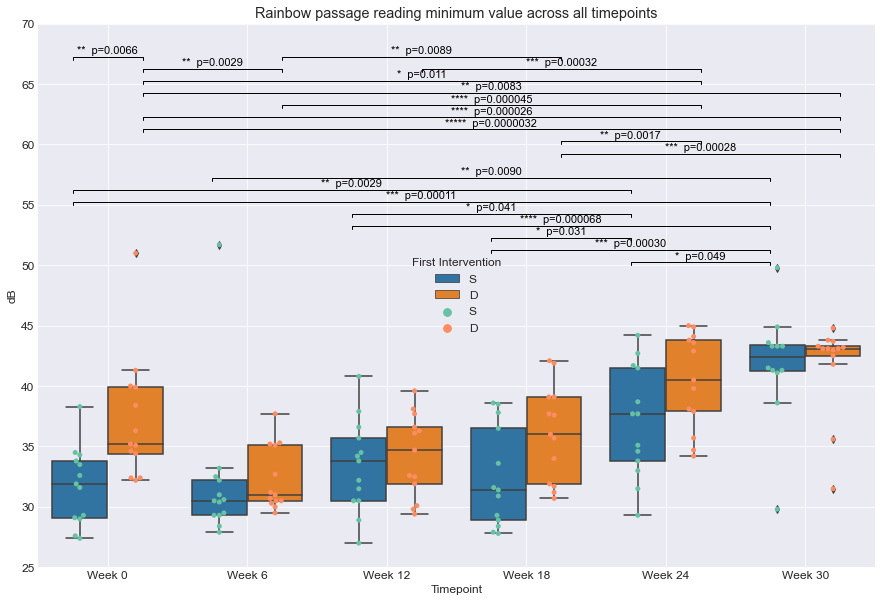

In [15]:
# Plot 1: Rainbow Low dB
ax4_dims=(15, 10)
fig2, ax4=plt.subplots(figsize=ax4_dims)
plt.ylim([25, 70])
sns.boxplot(x='Timepoint', y='dB', hue='First Intervention', data=a_plot)
sns.swarmplot(x='Timepoint', y='dB', hue='First Intervention', data=a_plot, palette='Set2', dodge=True)

plt.rcParams.update({'font.size': 11})
# BL
x1,x2,y1,y2=-0.25,0.25,67,67.25
ax4.plot([x1,x1,x2,x2], [y1,y2,y2,y1], lw=1, c='k')
ax4.text((x1+x2)*0.5, y2+.1, "**  p=0.0066", ha='center', va='bottom', size='medium', color='k')
# D 0 vs 6
x1,x2,y1,y2=0.25,1.25,66,66.25
ax4.plot([x1,x1,x2,x2], [y1,y2,y2,y1], lw=1, c='k')
ax4.text((x1+x2)*0.5, y2+.1, "**  p=0.0029", ha='center', va='bottom', size='medium', color='k')
# D 0 vs 24
x1,x2,y1,y2=0.25,4.25,65,65.25
ax4.plot([x1,x1,x2,x2], [y1,y2,y2,y1], lw=1, c='k')
ax4.text((x1+x2)*0.5, y2+.1, "*  p=0.011", ha='center', va='bottom', size='medium', color='k')
# D 0 vs 30
x1,x2,y1,y2=0.25,5.25,64,64.25
ax4.plot([x1,x1,x2,x2], [y1,y2,y2,y1], lw=1, c='k')
ax4.text((x1+x2)*0.5, y2+.1, "**  p=0.0083", ha='center', va='bottom', size='medium', color='k')
# D 6 vs 18
x1,x2,y1,y2=1.25,3.25,67,67.25
ax4.plot([x1,x1,x2,x2], [y1,y2,y2,y1], lw=1, c='k')
ax4.text((x1+x2)*0.5, y2+.1, "**  p=0.0089", ha='center', va='bottom', size='medium', color='k')
# D 6 vs 24
x1,x2,y1,y2=1.25,4.25,63,63.25
ax4.plot([x1,x1,x2,x2], [y1,y2,y2,y1], lw=1, c='k')
ax4.text((x1+x2)*0.5, y2+.1, "****  p=0.000045", ha='center', va='bottom', size='medium', color='k')
# D 6 vs 30
x1,x2,y1,y2=0.25,5.25,62,62.25
ax4.plot([x1,x1,x2,x2], [y1,y2,y2,y1], lw=1, c='k')
ax4.text((x1+x2)*0.5, y2+.1, "****  p=0.000026", ha='center', va='bottom', size='medium', color='k')
# D 12 vs 24
x1,x2,y1,y2=2.25,4.25,66,66.25
ax4.plot([x1,x1,x2,x2], [y1,y2,y2,y1], lw=1, c='k')
ax4.text((x1+x2)*0.5, y2+.1, "***  p=0.00032", ha='center', va='bottom', size='medium', color='k')
# D 12 vs 30
x1,x2,y1,y2=0.25,5.25,61,61.25
ax4.plot([x1,x1,x2,x2], [y1,y2,y2,y1], lw=1, c='k')
ax4.text((x1+x2)*0.5, y2+.1, "*****  p=0.0000032", ha='center', va='bottom', size='medium', color='k')
# D 18 vs 24
x1,x2,y1,y2=3.25,4.25,60,60.25
ax4.plot([x1,x1,x2,x2], [y1,y2,y2,y1], lw=1, c='k')
ax4.text((x1+x2)*0.5, y2+.1, "**  p=0.0017", ha='center', va='bottom', size='medium', color='k')
# D 18 vs 30
x1,x2,y1,y2=3.25,5.25,59,59.25
ax4.plot([x1,x1,x2,x2], [y1,y2,y2,y1], lw=1, c='k')
ax4.text((x1+x2)*0.5, y2+.1, "***  p=0.00028", ha='center', va='bottom', size='medium', color='k')

# S 0 vs 24
x1,x2,y1,y2=-0.25,3.75,56,56.25
ax4.plot([x1,x1,x2,x2], [y1,y2,y2,y1], lw=1, c='k')
ax4.text((x1+x2)*0.5, y2+.1, "**  p=0.0029", ha='center', va='bottom', size='medium', color='k')
# S 0 vs 30
x1,x2,y1,y2=-0.25,4.75,55,55.25
ax4.plot([x1,x1,x2,x2], [y1,y2,y2,y1], lw=1, c='k')
ax4.text((x1+x2)*0.5, y2+.1, "***  p=0.00011", ha='center', va='bottom', size='medium', color='k')
# S 6 vs 30
x1,x2,y1,y2=0.75,4.75,57,57.25
ax4.plot([x1,x1,x2,x2], [y1,y2,y2,y1], lw=1, c='k')
ax4.text((x1+x2)*0.5, y2+.1, "**  p=0.0090", ha='center', va='bottom', size='medium', color='k')
# S 12 vs 24
x1,x2,y1,y2=1.75,3.75,54,54.25
ax4.plot([x1,x1,x2,x2], [y1,y2,y2,y1], lw=1, c='k')
ax4.text((x1+x2)*0.5, y2+.1, "*  p=0.041", ha='center', va='bottom', size='medium', color='k')
# S 12 vs 30
x1,x2,y1,y2=1.75,4.75,53,53.25
ax4.plot([x1,x1,x2,x2], [y1,y2,y2,y1], lw=1, c='k')
ax4.text((x1+x2)*0.5, y2+.1, "****  p=0.000068", ha='center', va='bottom', size='medium', color='k')
# S 18 vs 24
x1,x2,y1,y2=2.75,3.75,52,52.25
ax4.plot([x1,x1,x2,x2], [y1,y2,y2,y1], lw=1, c='k')
ax4.text((x1+x2)*0.5, y2+.1, "*  p=0.031", ha='center', va='bottom', size='medium', color='k')
# S 18 vs 30
x1,x2,y1,y2=2.75,4.75,51,51.25
ax4.plot([x1,x1,x2,x2], [y1,y2,y2,y1], lw=1, c='k')
ax4.text((x1+x2)*0.5, y2+.1, "***  p=0.00030", ha='center', va='bottom', size='medium', color='k')
# S 24 vs 30
x1,x2,y1,y2=3.75,4.75,50,50.25
ax4.plot([x1,x1,x2,x2], [y1,y2,y2,y1], lw=1, c='k')
ax4.text((x1+x2)*0.5, y2+.1, "*  p=0.049", ha='center', va='bottom', size='medium', color='k')



# Format
ax4.grid(True)
ax4.set_xlabel('Timepoint')
ax4.title.set_text('Rainbow passage reading minimum value across all timepoints')

currentfig=plt.gcf()


In [16]:
plt.rcParams.update({'font.size': 12})

Save

In [17]:
currentfig.savefig(r'C:\Users\kevin\Documents\JHU\Research\Parkinsonics\Manuscript\Figures\Fig3a_8232022.pdf', format="pdf", bbox_inches="tight", dpi=300)

Cookie: BL, S(0vs12, 0vs24, 0vs30, 6vs30, 12vs18, 12vs24, 12vs30, 18vs24, 18vs30, 24vs30) D(0vs6, 0vs30, 6vs24, 6vs30, 12vs24, 12vs30, 18vs24, 18vs30)

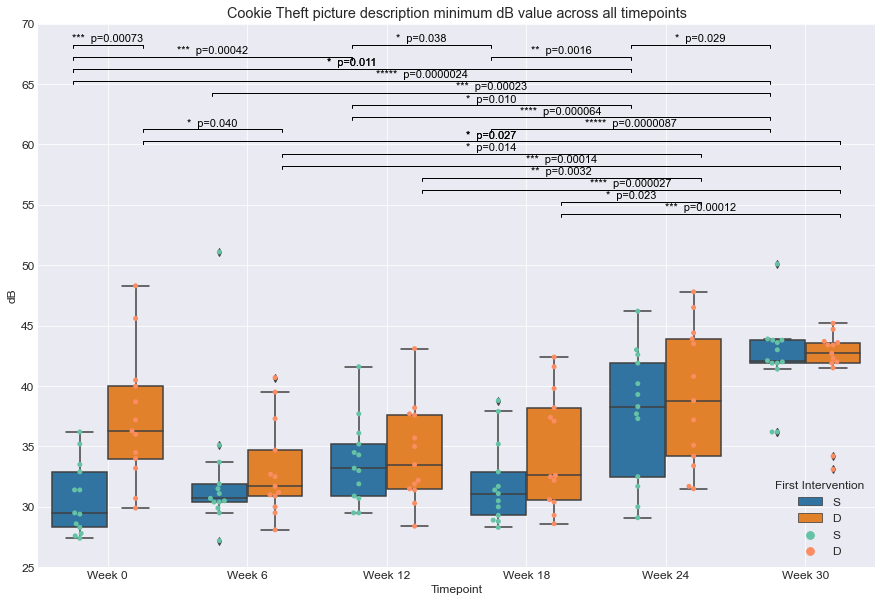

In [18]:
# Plot 2: Cookie Low dB
ax5_dims=(15, 10)
fig3, ax5=plt.subplots(figsize=ax5_dims)
plt.ylim([25,70])
sns.boxplot(x='Timepoint', y='dB', hue='First Intervention', data=b_plot)
sns.swarmplot(x='Timepoint', y='dB', hue='First Intervention', data=b_plot, palette='Set2', dodge=True)

plt.rcParams.update({'font.size': 11})
# Add significance brackets/stars
# BL
x1,x2,y1,y2=-0.25,0.25,68,68.25
ax5.plot([x1,x1,x2,x2], [y1,y2,y2,y1], lw=1, c='k')
ax5.text((x1+x2)*0.5, y2+.1, "***  p=0.00073", ha='center', va='bottom', size='medium', color='k')
# S 0 vs 12
x1,x2,y1,y2=-0.25,1.75,67,67.25
ax5.plot([x1,x1,x2,x2], [y1,y2,y2,y1], lw=1, c='k')
ax5.text((x1+x2)*0.5, y2+.1, "***  p=0.00042", ha='center', va='bottom', size='medium', color='k')
# S 0 vs 24
x1,x2,y1,y2=-0.25,3.75,66,66.25
ax5.plot([x1,x1,x2,x2], [y1,y2,y2,y1], lw=1, c='k')
ax5.text((x1+x2)*0.5, y2+.1, "*  p=0.011", ha='center', va='bottom', size='medium', color='k')
# S 0 vs 30
x1,x2,y1,y2=-0.25,4.75,65,65.25
ax5.plot([x1,x1,x2,x2], [y1,y2,y2,y1], lw=1, c='k')
ax5.text((x1+x2)*0.5, y2+.1, "*****  p=0.0000024", ha='center', va='bottom', size='medium', color='k')
# S 0 vs 24
x1,x2,y1,y2=-0.25,3.75,66,66.25
ax5.plot([x1,x1,x2,x2], [y1,y2,y2,y1], lw=1, c='k')
ax5.text((x1+x2)*0.5, y2+.1, "*  p=0.011", ha='center', va='bottom', size='medium', color='k')
# S 6 vs 30
x1,x2,y1,y2=0.75,4.75,64,64.25
ax5.plot([x1,x1,x2,x2], [y1,y2,y2,y1], lw=1, c='k')
ax5.text((x1+x2)*0.5, y2+.1, "***  p=0.00023", ha='center', va='bottom', size='medium', color='k')
# S 12 vs 18
x1,x2,y1,y2=1.75,2.75,68,68.25
ax5.plot([x1,x1,x2,x2], [y1,y2,y2,y1], lw=1, c='k')
ax5.text((x1+x2)*0.5, y2+.1, "*  p=0.038", ha='center', va='bottom', size='medium', color='k')
# S 12 vs 24
x1,x2,y1,y2=1.75,3.75,63,63.25
ax5.plot([x1,x1,x2,x2], [y1,y2,y2,y1], lw=1, c='k')
ax5.text((x1+x2)*0.5, y2+.1, "*  p=0.010", ha='center', va='bottom', size='medium', color='k')
# S 12 vs 30
x1,x2,y1,y2=1.75,4.75,62,62.25
ax5.plot([x1,x1,x2,x2], [y1,y2,y2,y1], lw=1, c='k')
ax5.text((x1+x2)*0.5, y2+.1, "****  p=0.000064", ha='center', va='bottom', size='medium', color='k')
# S 18 vs 24
x1,x2,y1,y2=2.75,3.75,67,67.25
ax5.plot([x1,x1,x2,x2], [y1,y2,y2,y1], lw=1, c='k')
ax5.text((x1+x2)*0.5, y2+.1, "**  p=0.0016", ha='center', va='bottom', size='medium', color='k')
# S 18 vs 30
x1,x2,y1,y2=2.75,4.75,61,61.25
ax5.plot([x1,x1,x2,x2], [y1,y2,y2,y1], lw=1, c='k')
ax5.text((x1+x2)*0.5, y2+.1, "*****  p=0.0000087", ha='center', va='bottom', size='medium', color='k')
# S 24 vs 30
x1,x2,y1,y2=3.75,4.75,68,68.25
ax5.plot([x1,x1,x2,x2], [y1,y2,y2,y1], lw=1, c='k')
ax5.text((x1+x2)*0.5, y2+.1, "*  p=0.029", ha='center', va='bottom', size='medium', color='k')

# D 0 vs 6
x1,x2,y1,y2=0.25,1.25,61,61.25
ax5.plot([x1,x1,x2,x2], [y1,y2,y2,y1], lw=1, c='k')
ax5.text((x1+x2)*0.5, y2+.1, "*  p=0.040", ha='center', va='bottom', size='medium', color='k')
# D 0 vs 30
x1,x2,y1,y2=0.25,5.25,60,60.25
ax5.plot([x1,x1,x2,x2], [y1,y2,y2,y1], lw=1, c='k')
ax5.text((x1+x2)*0.5, y2+.1, "*  p=0.027", ha='center', va='bottom', size='medium', color='k')
# D 0 vs 30
x1,x2,y1,y2=0.25,5.25,60,60.25
ax5.plot([x1,x1,x2,x2], [y1,y2,y2,y1], lw=1, c='k')
ax5.text((x1+x2)*0.5, y2+.1, "*  p=0.027", ha='center', va='bottom', size='medium', color='k')
# D 6 vs 24
x1,x2,y1,y2=1.25,4.25,59,59.25
ax5.plot([x1,x1,x2,x2], [y1,y2,y2,y1], lw=1, c='k')
ax5.text((x1+x2)*0.5, y2+.1, "*  p=0.014", ha='center', va='bottom', size='medium', color='k')
# D 6 vs 30
x1,x2,y1,y2=1.25,5.25,58,58.25
ax5.plot([x1,x1,x2,x2], [y1,y2,y2,y1], lw=1, c='k')
ax5.text((x1+x2)*0.5, y2+.1, "***  p=0.00014", ha='center', va='bottom', size='medium', color='k')
# D 12 vs 24
x1,x2,y1,y2=2.25,4.25,57,57.25
ax5.plot([x1,x1,x2,x2], [y1,y2,y2,y1], lw=1, c='k')
ax5.text((x1+x2)*0.5, y2+.1, "**  p=0.0032", ha='center', va='bottom', size='medium', color='k')
# D 12 vs 30
x1,x2,y1,y2=2.25,5.25,56,56.25
ax5.plot([x1,x1,x2,x2], [y1,y2,y2,y1], lw=1, c='k')
ax5.text((x1+x2)*0.5, y2+.1, "****  p=0.000027", ha='center', va='bottom', size='medium', color='k')
# D 18 vs 24
x1,x2,y1,y2=3.25,4.25,55,55.25
ax5.plot([x1,x1,x2,x2], [y1,y2,y2,y1], lw=1, c='k')
ax5.text((x1+x2)*0.5, y2+.1, "*  p=0.023", ha='center', va='bottom', size='medium', color='k')
# D 18 vs 30
x1,x2,y1,y2=3.25,5.25,54,54.25
ax5.plot([x1,x1,x2,x2], [y1,y2,y2,y1], lw=1, c='k')
ax5.text((x1+x2)*0.5, y2+.1, "***  p=0.00012", ha='center', va='bottom', size='medium', color='k')




# Format
ax5.grid(True)
ax5.set_xlabel('Timepoint')
ax5.title.set_text('Cookie Theft picture description minimum dB value across all timepoints')

currentfig=plt.gcf()

In [19]:
plt.rcParams.update({'font.size': 12})

Save

In [21]:
currentfig.savefig(r'C:\Users\kevin\Documents\JHU\Research\Parkinsonics\Manuscript\Figures\Fig3b_8232022.pdf', format="pdf", bbox_inches="tight", dpi=300)

   ## Figure 4 - Boxplots for MDS-UPDRS Subscore III
   
   Nest groups, plot across all timepoints 

In [22]:
timepoints=['Week 0', 'Week 6', 'Week 12', 'Week 18', 'Week 24', 'Week 30']

target_row=4
# Move target row to first element of list so that S will be first group in plots
idx=[target_row]+[i for i in range(len(mdsdf)) if i != target_row]
c=mdsdf.iloc[idx]

Melt df so that have all data from all timepoints in one col, then identify tp, S/D in subsequent cols

In [23]:
c_plot=pd.DataFrame()

# dB data
c_plot['Score']=c['BL'].append(c['V01']).append(c['V02']).append(c['V03']).append(c['V04']).append(c['V05'])
# Timepoints
tp_plot=[]
for i in timepoints:
    for j in range(26):
        tp_plot.append(i)
c_plot['Timepoint']=tp_plot
# First intervention
c_plot['First Intervention']=c['First Intervention'].append(c['First Intervention']).append(c['First Intervention']).append(c['First Intervention']).append(c['First Intervention']).append(c['First Intervention'])

Create figures for the plot

Label only bottom x-axis with timepoints (Bela prefers weeks)

Add significance brackets for:

S(0vs6, 0vs12, 0vs18, 0vs24, 0vs30, 6vs12, 6vs18, 6vs30), D(0vs6, 0vs12, 0vs18, 0vs24, 0vs30)

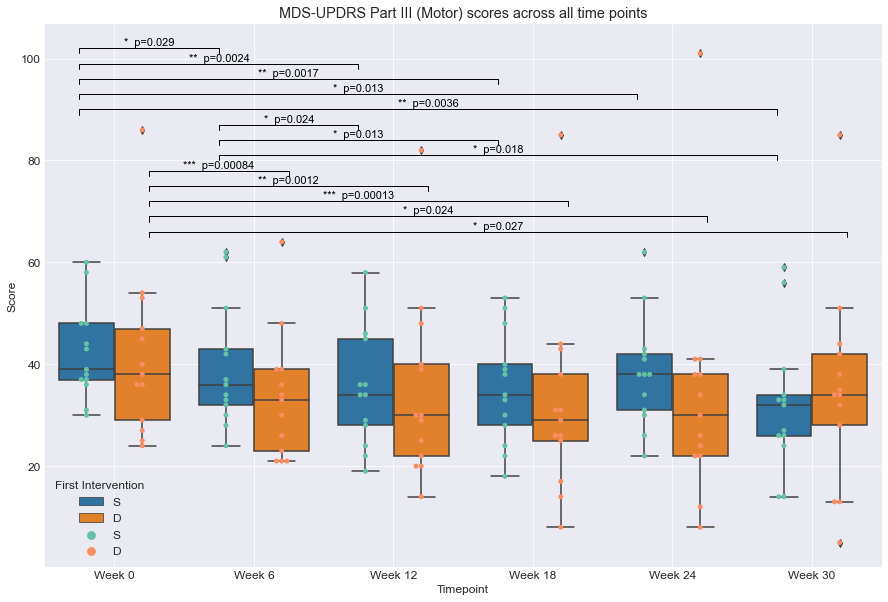

In [24]:
# MDS-UPDRS Plot
ax6_dims=(15, 10)
fig4, ax6=plt.subplots(figsize=ax6_dims)
sns.boxplot(x='Timepoint', y='Score', hue='First Intervention', data=c_plot)
sns.swarmplot(x='Timepoint', y='Score', hue='First Intervention', data=c_plot, palette='Set2', dodge=True)

plt.rcParams.update({'font.size': 11})
# S 0 vs 6
x1,x2,y1,y2=-0.25,0.75,101,102
ax6.plot([x1,x1,x2,x2], [y1,y2,y2,y1], lw=1, c='k')
ax6.text((x1+x2)*0.5, y2+.11, "*  p=0.029", ha='center', va='bottom', size='medium', color='k')
# S 0 vs 12
x1,x2,y1,y2=-0.25,1.75,98,99
ax6.plot([x1,x1,x2,x2], [y1,y2,y2,y1], lw=1, c='k')
ax6.text((x1+x2)*0.5, y2+.11, "**  p=0.0024", ha='center', va='bottom', size='medium', color='k')
# S 0 vs 18
x1,x2,y1,y2=-0.25,2.75,95,96
ax6.plot([x1,x1,x2,x2], [y1,y2,y2,y1], lw=1, c='k')
ax6.text((x1+x2)*0.5, y2+.11, "**  p=0.0017", ha='center', va='bottom', size='medium', color='k')
# S 0 vs 24
x1,x2,y1,y2=-0.25,3.75,92,93
ax6.plot([x1,x1,x2,x2], [y1,y2,y2,y1], lw=1, c='k')
ax6.text((x1+x2)*0.5, y2+.11, "*  p=0.013", ha='center', va='bottom', size='medium', color='k')
# S 0 vs 30
x1,x2,y1,y2=-0.25,4.75,89,90
ax6.plot([x1,x1,x2,x2], [y1,y2,y2,y1], lw=1, c='k')
ax6.text((x1+x2)*0.5, y2+.11, "**  p=0.0036", ha='center', va='bottom', size='medium', color='k')
# S 6 vs 12
x1,x2,y1,y2=0.75,1.75,86,87
ax6.plot([x1,x1,x2,x2], [y1,y2,y2,y1], lw=1, c='k')
ax6.text((x1+x2)*0.5, y2+.11, "*  p=0.024", ha='center', va='bottom', size='medium', color='k')
# S 6 vs 18
x1,x2,y1,y2=0.75,2.75,83,84
ax6.plot([x1,x1,x2,x2], [y1,y2,y2,y1], lw=1, c='k')
ax6.text((x1+x2)*0.5, y2+.11, "*  p=0.013", ha='center', va='bottom', size='medium', color='k')
# S 6 vs 30
x1,x2,y1,y2=0.75,4.75,80,81
ax6.plot([x1,x1,x2,x2], [y1,y2,y2,y1], lw=1, c='k')
ax6.text((x1+x2)*0.5, y2+.11, "*  p=0.018", ha='center', va='bottom', size='medium', color='k')
# D 0 vs 6
x1,x2,y1,y2=0.25,1.25,77,78
ax6.plot([x1,x1,x2,x2], [y1,y2,y2,y1], lw=1, c='k')
ax6.text((x1+x2)*0.5, y2+.11, "***  p=0.00084", ha='center', va='bottom', size='medium', color='k')
# D 0 vs 12
x1,x2,y1,y2=0.25,2.25,74,75
ax6.plot([x1,x1,x2,x2], [y1,y2,y2,y1], lw=1, c='k')
ax6.text((x1+x2)*0.5, y2+.11, "**  p=0.0012", ha='center', va='bottom', size='medium', color='k')
# D 0 vs 18
x1,x2,y1,y2=0.25,3.25,71,72
ax6.plot([x1,x1,x2,x2], [y1,y2,y2,y1], lw=1, c='k')
ax6.text((x1+x2)*0.5, y2+.11, "***  p=0.00013", ha='center', va='bottom', size='medium', color='k')
# D 0 vs 24
x1,x2,y1,y2=0.25,4.25,68,69
ax6.plot([x1,x1,x2,x2], [y1,y2,y2,y1], lw=1, c='k')
ax6.text((x1+x2)*0.5, y2+.11, "*  p=0.024", ha='center', va='bottom', size='medium', color='k')
# D 0 vs 30
x1,x2,y1,y2=0.25,5.25,65,66
ax6.plot([x1,x1,x2,x2], [y1,y2,y2,y1], lw=1, c='k')
ax6.text((x1+x2)*0.5, y2+.11, "*  p=0.027", ha='center', va='bottom', size='medium', color='k')



# Format
ax6.grid(True)
ax6.set_xlabel('Timepoint')
ax6.title.set_text('MDS-UPDRS Part III (Motor) scores across all time points')

currentfig=plt.gcf()
plt.rcParams.update({'font.size': 12})

Save

In [25]:
currentfig.savefig(r'C:\Users\kevin\Documents\JHU\Research\Parkinsonics\Manuscript\Figures\Fig5_08232022.pdf', format="pdf", bbox_inches="tight", dpi=150)

# Supplementary Figures

## Vocal Measures S vs D boxplots

Plots: want to compare deltas from two different interventions (singing and discussion) in each group

Comparison should be btwn S1 and S2, and D1 and D2


## A Loud plots

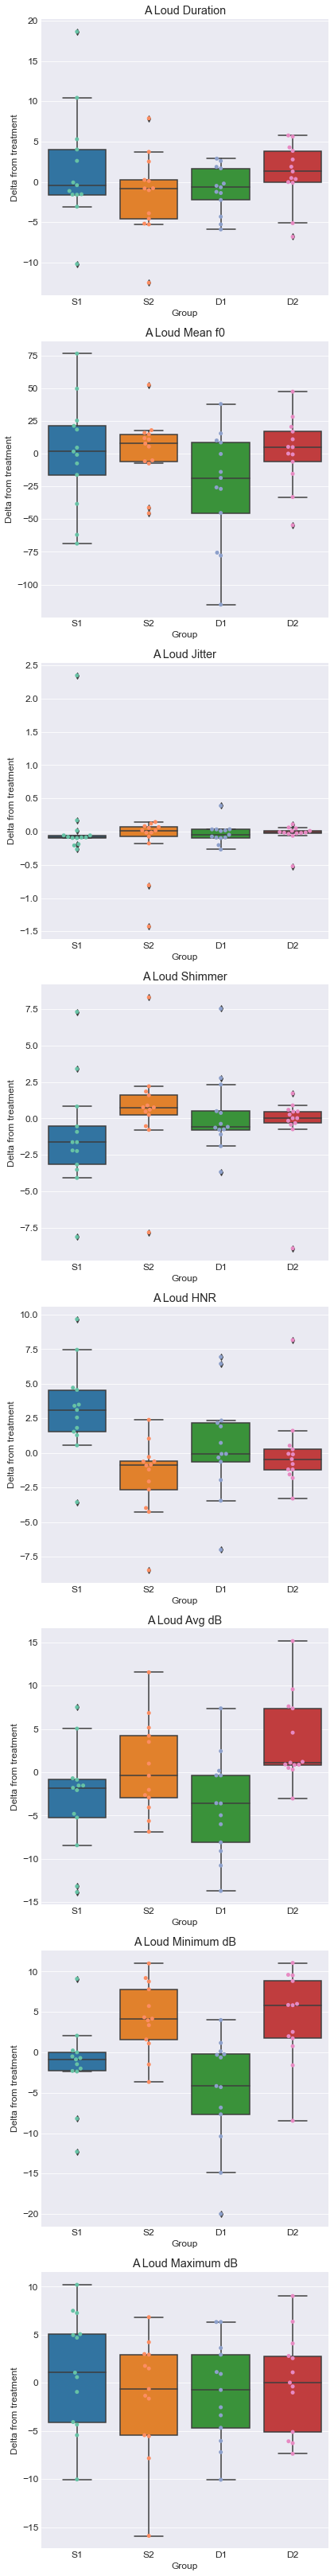

In [26]:
# Duration, Mean f0, Jitter, Shimer, HNR, Avg dB, Min dB, Max dB
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8)=plt.subplots(8,1,figsize=(6,48))
#fig.suptitle('Outcome measures from each intervention in singing and discussion first groups')

sns.boxplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=amax_dur_plot, ax=ax1).set_title('A Loud Duration',)
sns.swarmplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=amax_dur_plot, palette='Set2', ax=ax1)

sns.boxplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=amax_mf0_plot, ax=ax2).set_title('A Loud Mean f0')
sns.swarmplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=amax_mf0_plot, palette='Set2', ax=ax2)

sns.boxplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=amax_jit_plot, ax=ax3).set_title('A Loud Jitter')
sns.swarmplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=amax_jit_plot, palette='Set2', ax=ax3)

sns.boxplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=amax_shm_plot, ax=ax4).set_title('A Loud Shimmer')
sns.swarmplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=amax_shm_plot, palette='Set2', ax=ax4)

sns.boxplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=amax_hnr_plot, ax=ax5).set_title('A Loud HNR')
sns.swarmplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=amax_hnr_plot, palette='Set2', ax=ax5)

sns.boxplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=amax_avgdb_plot, ax=ax6).set_title('A Loud Avg dB')
sns.swarmplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=amax_avgdb_plot, palette='Set2', ax=ax6)

sns.boxplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=amax_mindb_plot, ax=ax7).set_title('A Loud Minimum dB')
sns.swarmplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=amax_mindb_plot, palette='Set2', ax=ax7)

sns.boxplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=amax_maxdb_plot, ax=ax8).set_title('A Loud Maximum dB')
sns.swarmplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=amax_maxdb_plot, palette='Set2', ax=ax8)

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
currentfig=plt.gcf()

In [29]:
currentfig.savefig(r'C:\Users\kevin\Documents\JHU\Research\Parkinsonics\Manuscript\Figures\SuppBox_A_08232022.pdf', format="pdf", bbox_inches="tight", dpi=150)

## A Speaking plots

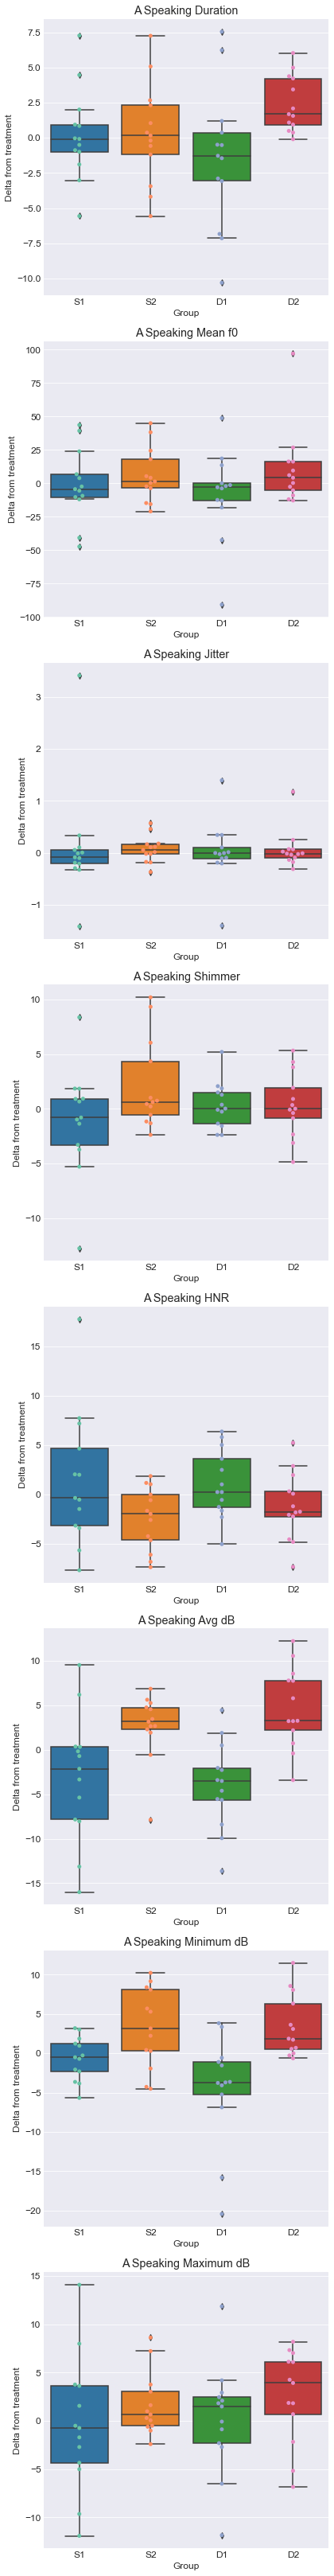

In [30]:
# Duration, Mean f0, Jitter, Shimer, HNR, Avg dB, Min dB, Max dB
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8)=plt.subplots(8,1,figsize=(6,48))

sns.boxplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=amin_dur_plot, ax=ax1).set_title('A Speaking Duration',)
sns.swarmplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=amin_dur_plot, palette='Set2', ax=ax1)

sns.boxplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=amin_mf0_plot, ax=ax2).set_title('A Speaking Mean f0')
sns.swarmplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=amin_mf0_plot, palette='Set2', ax=ax2)

sns.boxplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=amin_jit_plot, ax=ax3).set_title('A Speaking Jitter')
sns.swarmplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=amin_jit_plot, palette='Set2', ax=ax3)

sns.boxplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=amin_shm_plot, ax=ax4).set_title('A Speaking Shimmer')
sns.swarmplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=amin_shm_plot, palette='Set2', ax=ax4)

sns.boxplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=amin_hnr_plot, ax=ax5).set_title('A Speaking HNR')
sns.swarmplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=amin_hnr_plot, palette='Set2', ax=ax5)

sns.boxplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=amin_avgdb_plot, ax=ax6).set_title('A Speaking Avg dB')
sns.swarmplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=amin_avgdb_plot, palette='Set2', ax=ax6)

sns.boxplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=amin_mindb_plot, ax=ax7).set_title('A Speaking Minimum dB')
sns.swarmplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=amin_mindb_plot, palette='Set2', ax=ax7)

sns.boxplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=amin_maxdb_plot, ax=ax8).set_title('A Speaking Maximum dB')
sns.swarmplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=amin_maxdb_plot, palette='Set2', ax=ax8)

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
currentfig=plt.gcf()

In [31]:
currentfig.savefig(r'C:\Users\kevin\Documents\JHU\Research\Parkinsonics\Manuscript\Figures\SuppBox_B_08232022.pdf', format="pdf", bbox_inches="tight", dpi=150)

## E Loud plots

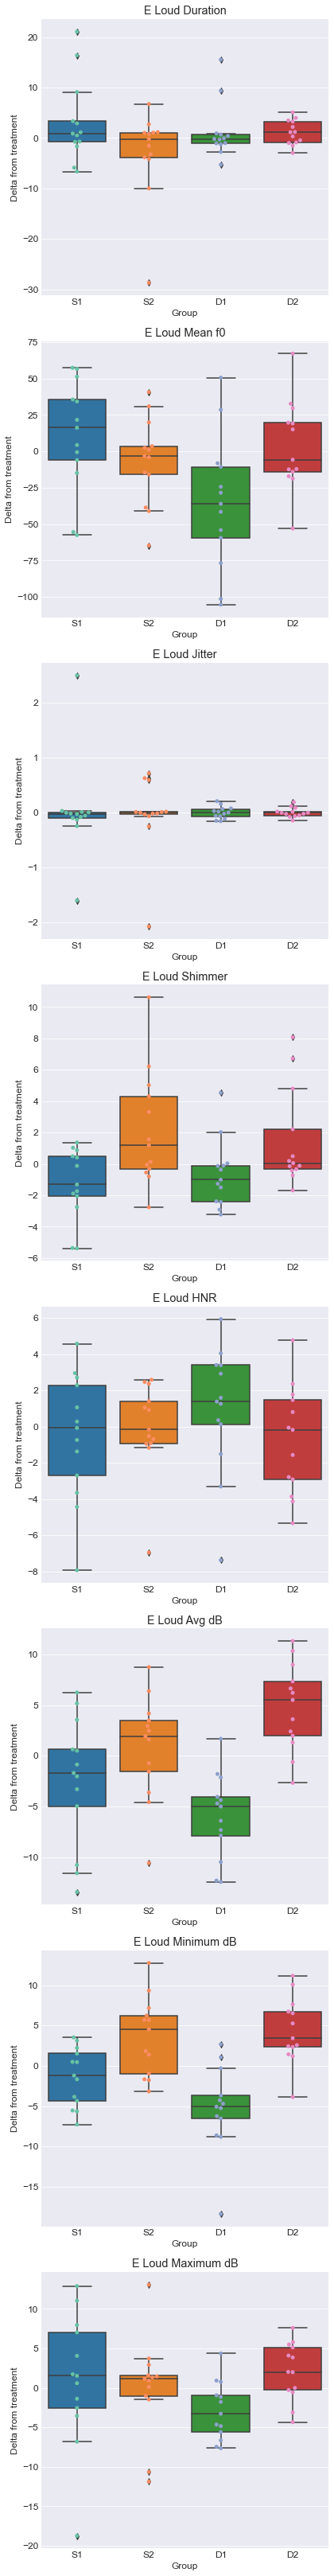

In [32]:
# Duration, Mean f0, Jitter, Shimer, HNR, Avg dB, Min dB, Max dB
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8)=plt.subplots(8,1,figsize=(6,48))

sns.boxplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=emax_dur_plot, ax=ax1).set_title('E Loud Duration',)
sns.swarmplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=emax_dur_plot, palette='Set2', ax=ax1)

sns.boxplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=emax_mf0_plot, ax=ax2).set_title('E Loud Mean f0')
sns.swarmplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=emax_mf0_plot, palette='Set2', ax=ax2)

sns.boxplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=emax_jit_plot, ax=ax3).set_title('E Loud Jitter')
sns.swarmplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=emax_jit_plot, palette='Set2', ax=ax3)

sns.boxplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=emax_shm_plot, ax=ax4).set_title('E Loud Shimmer')
sns.swarmplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=emax_shm_plot, palette='Set2', ax=ax4)

sns.boxplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=emax_hnr_plot, ax=ax5).set_title('E Loud HNR')
sns.swarmplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=emax_hnr_plot, palette='Set2', ax=ax5)

sns.boxplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=emax_avgdb_plot, ax=ax6).set_title('E Loud Avg dB')
sns.swarmplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=emax_avgdb_plot, palette='Set2', ax=ax6)

sns.boxplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=emax_mindb_plot, ax=ax7).set_title('E Loud Minimum dB')
sns.swarmplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=emax_mindb_plot, palette='Set2', ax=ax7)

sns.boxplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=emax_maxdb_plot, ax=ax8).set_title('E Loud Maximum dB')
sns.swarmplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=emax_maxdb_plot, palette='Set2', ax=ax8)

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
currentfig=plt.gcf()

In [33]:
currentfig.savefig(r'C:\Users\kevin\Documents\JHU\Research\Parkinsonics\Manuscript\Figures\SuppBox_C_08232022.pdf', format="pdf", bbox_inches="tight", dpi=150)

## E Speaking plots

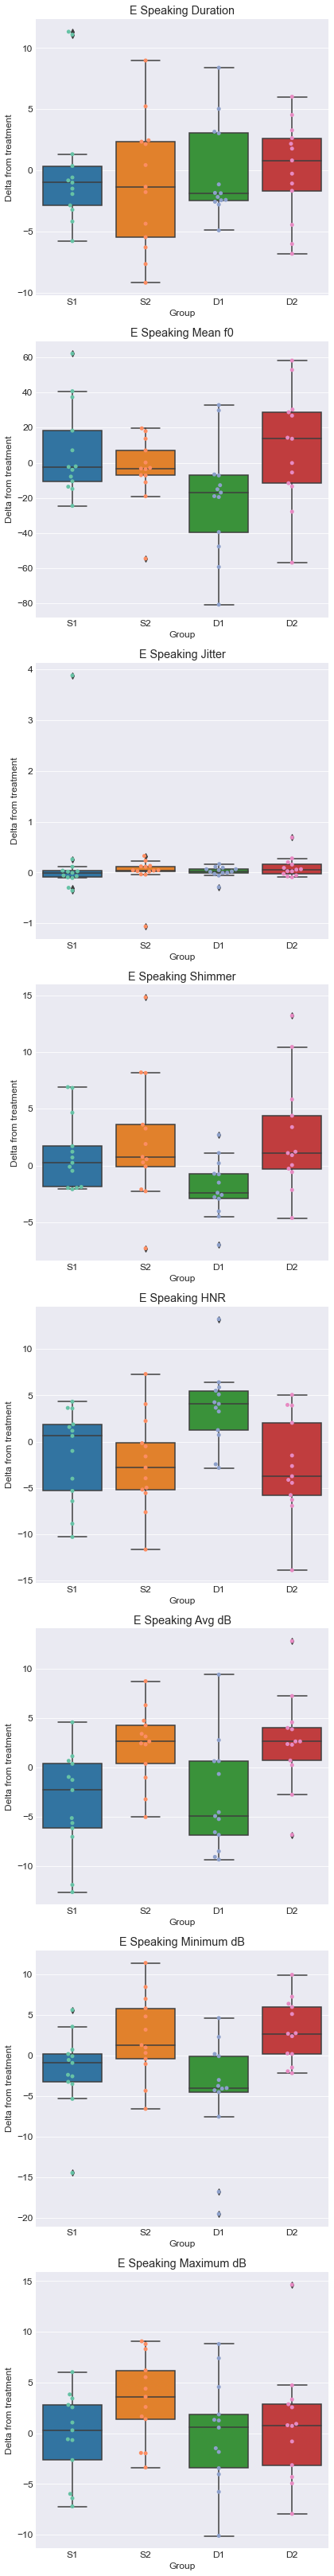

In [34]:
# Duration, Mean f0, Jitter, Shimer, HNR, Avg dB, Min dB, Max dB
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8)=plt.subplots(8,1,figsize=(6,48))

sns.boxplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=emin_dur_plot, ax=ax1).set_title('E Speaking Duration',)
sns.swarmplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=emin_dur_plot, palette='Set2', ax=ax1)

sns.boxplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=emin_mf0_plot, ax=ax2).set_title('E Speaking Mean f0')
sns.swarmplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=emin_mf0_plot, palette='Set2', ax=ax2)

sns.boxplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=emin_jit_plot, ax=ax3).set_title('E Speaking Jitter')
sns.swarmplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=emin_jit_plot, palette='Set2', ax=ax3)

sns.boxplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=emin_shm_plot, ax=ax4).set_title('E Speaking Shimmer')
sns.swarmplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=emin_shm_plot, palette='Set2', ax=ax4)

sns.boxplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=emin_hnr_plot, ax=ax5).set_title('E Speaking HNR')
sns.swarmplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=emin_hnr_plot, palette='Set2', ax=ax5)

sns.boxplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=emin_avgdb_plot, ax=ax6).set_title('E Speaking Avg dB')
sns.swarmplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=emin_avgdb_plot, palette='Set2', ax=ax6)

sns.boxplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=emin_mindb_plot, ax=ax7).set_title('E Speaking Minimum dB')
sns.swarmplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=emin_mindb_plot, palette='Set2', ax=ax7)

sns.boxplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=emin_maxdb_plot, ax=ax8).set_title('E Speaking Maximum dB')
sns.swarmplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=emin_maxdb_plot, palette='Set2', ax=ax8)

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
currentfig=plt.gcf()

In [35]:
currentfig.savefig(r'C:\Users\kevin\Documents\JHU\Research\Parkinsonics\Manuscript\Figures\SuppBox_D_08232022.pdf', format="pdf", bbox_inches="tight", dpi=150)

## Rainbow plots

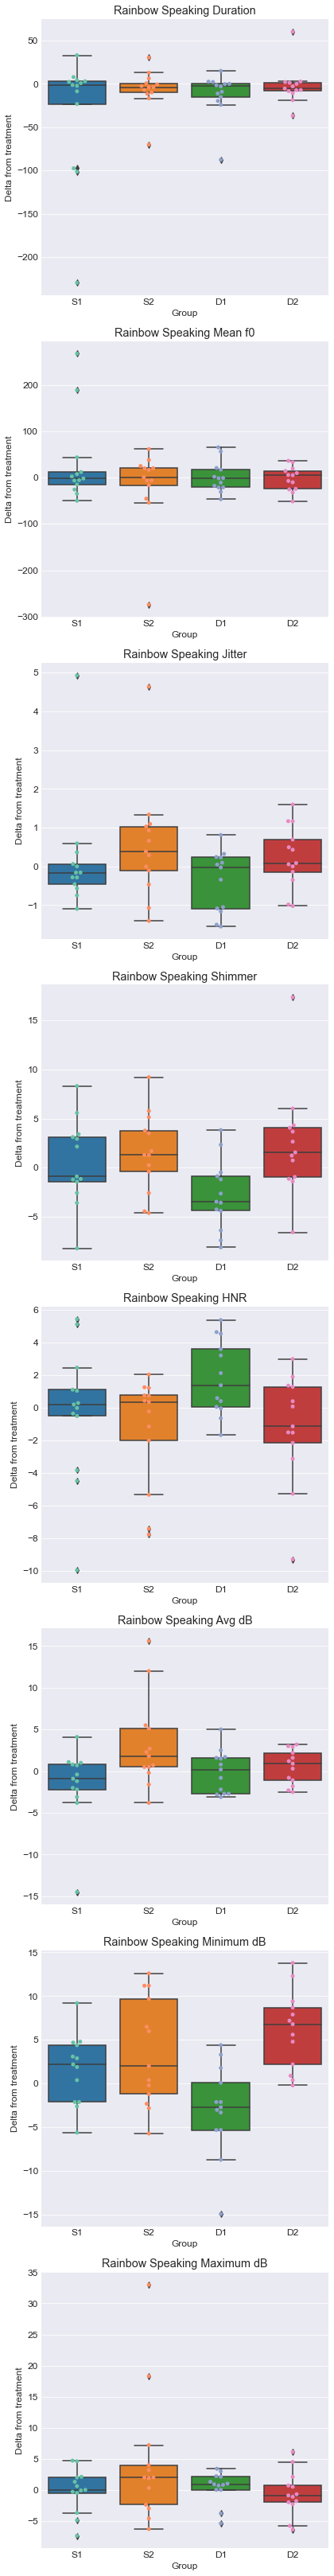

In [36]:
# Duration, Mean f0, Jitter, Shimer, HNR, Avg dB, Min dB, Max dB
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8)=plt.subplots(8,1,figsize=(6,48))

sns.boxplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=rain_dur_plot, ax=ax1).set_title('Rainbow Speaking Duration',)
sns.swarmplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=rain_dur_plot, palette='Set2', ax=ax1)

sns.boxplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=rain_mf0_plot, ax=ax2).set_title('Rainbow Speaking Mean f0')
sns.swarmplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=rain_mf0_plot, palette='Set2', ax=ax2)

sns.boxplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=rain_jit_plot, ax=ax3).set_title('Rainbow Speaking Jitter')
sns.swarmplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=rain_jit_plot, palette='Set2', ax=ax3)

sns.boxplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=rain_shm_plot, ax=ax4).set_title('Rainbow Speaking Shimmer')
sns.swarmplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=rain_shm_plot, palette='Set2', ax=ax4)

sns.boxplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=rain_hnr_plot, ax=ax5).set_title('Rainbow Speaking HNR')
sns.swarmplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=rain_hnr_plot, palette='Set2', ax=ax5)

sns.boxplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=rain_avgdb_plot, ax=ax6).set_title('Rainbow Speaking Avg dB')
sns.swarmplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=rain_avgdb_plot, palette='Set2', ax=ax6)

sns.boxplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=rain_mindb_plot, ax=ax7).set_title('Rainbow Speaking Minimum dB')
sns.swarmplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=rain_mindb_plot, palette='Set2', ax=ax7)

sns.boxplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=rain_maxdb_plot, ax=ax8).set_title('Rainbow Speaking Maximum dB')
sns.swarmplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=rain_maxdb_plot, palette='Set2', ax=ax8)

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
currentfig=plt.gcf()

In [37]:
currentfig.savefig(r'C:\Users\kevin\Documents\JHU\Research\Parkinsonics\Manuscript\Figures\SuppBox_E_08232022.pdf', format="pdf", bbox_inches="tight", dpi=150)

## Cookie plots

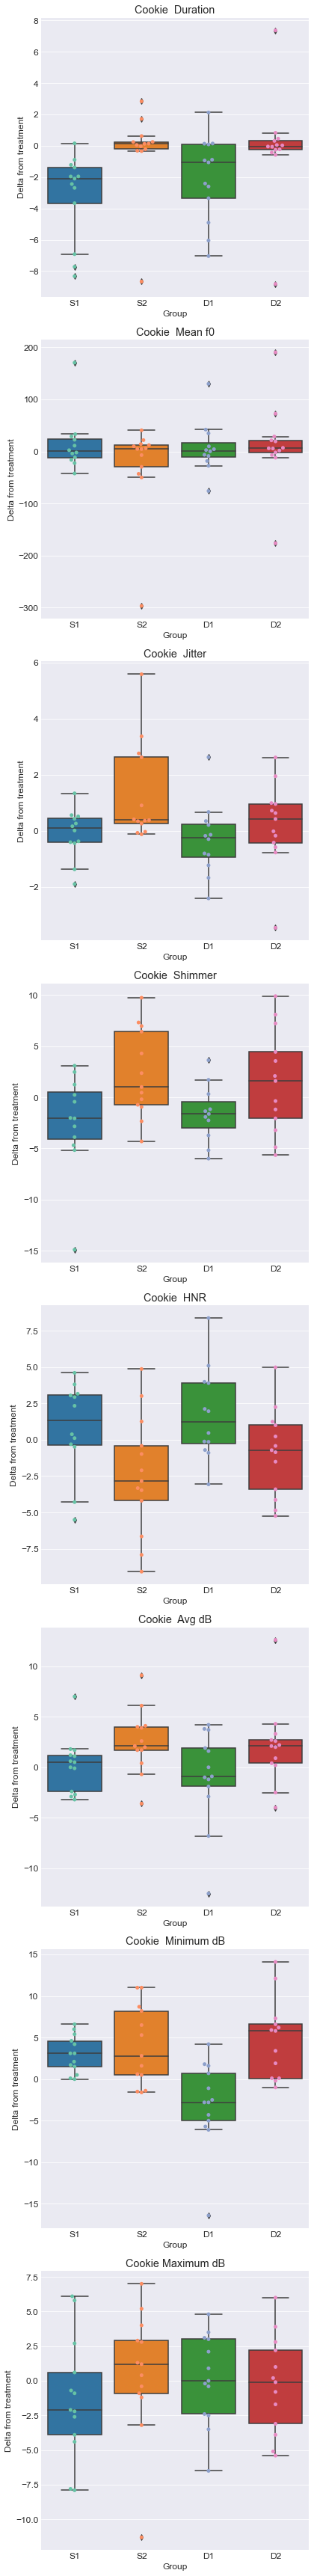

In [38]:
# Duration, Mean f0, Jitter, Shimer, HNR, Avg dB, Min dB, Max dB
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8)=plt.subplots(8,1,figsize=(6,48))

sns.boxplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=cookie_dur_plot, ax=ax1).set_title('Cookie  Duration',)
sns.swarmplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=cookie_dur_plot, palette='Set2', ax=ax1)

sns.boxplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=cookie_mf0_plot, ax=ax2).set_title('Cookie  Mean f0')
sns.swarmplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=cookie_mf0_plot, palette='Set2', ax=ax2)

sns.boxplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=cookie_jit_plot, ax=ax3).set_title('Cookie  Jitter')
sns.swarmplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=cookie_jit_plot, palette='Set2', ax=ax3)

sns.boxplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=cookie_shm_plot, ax=ax4).set_title('Cookie  Shimmer')
sns.swarmplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=cookie_shm_plot, palette='Set2', ax=ax4)

sns.boxplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=cookie_hnr_plot, ax=ax5).set_title('Cookie  HNR')
sns.swarmplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=cookie_hnr_plot, palette='Set2', ax=ax5)

sns.boxplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=cookie_avgdb_plot, ax=ax6).set_title('Cookie  Avg dB')
sns.swarmplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=cookie_avgdb_plot, palette='Set2', ax=ax6)

sns.boxplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=cookie_mindb_plot, ax=ax7).set_title('Cookie  Minimum dB')
sns.swarmplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=cookie_mindb_plot, palette='Set2', ax=ax7)

sns.boxplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=cookie_maxdb_plot, ax=ax8).set_title('Cookie Maximum dB')
sns.swarmplot(x='Group', y='Delta from treatment', order=['S1', 'S2', 'D1', 'D2'], data=cookie_maxdb_plot, palette='Set2', ax=ax8)

plt.tight_layout()
currentfig=plt.gcf()

In [39]:
currentfig.savefig(r'C:\Users\kevin\Documents\JHU\Research\Parkinsonics\Manuscript\Figures\SuppBox_F_08232022.pdf', format="pdf", bbox_inches="tight", dpi=150)

## Vocal Measures S and D spaghetti plots

Plots: one plot for each of S and D groups for each vocal measure. Total 96 plots

S next to D for each measure, so 48 "cells" - cells arranged in 8 rows x 6 cols (each row is vocal measure, each col is vowel sound/passage - effectively 8 by 12 subplot)


## A Loud S plots

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anacond

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anacond

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anacond

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anacond

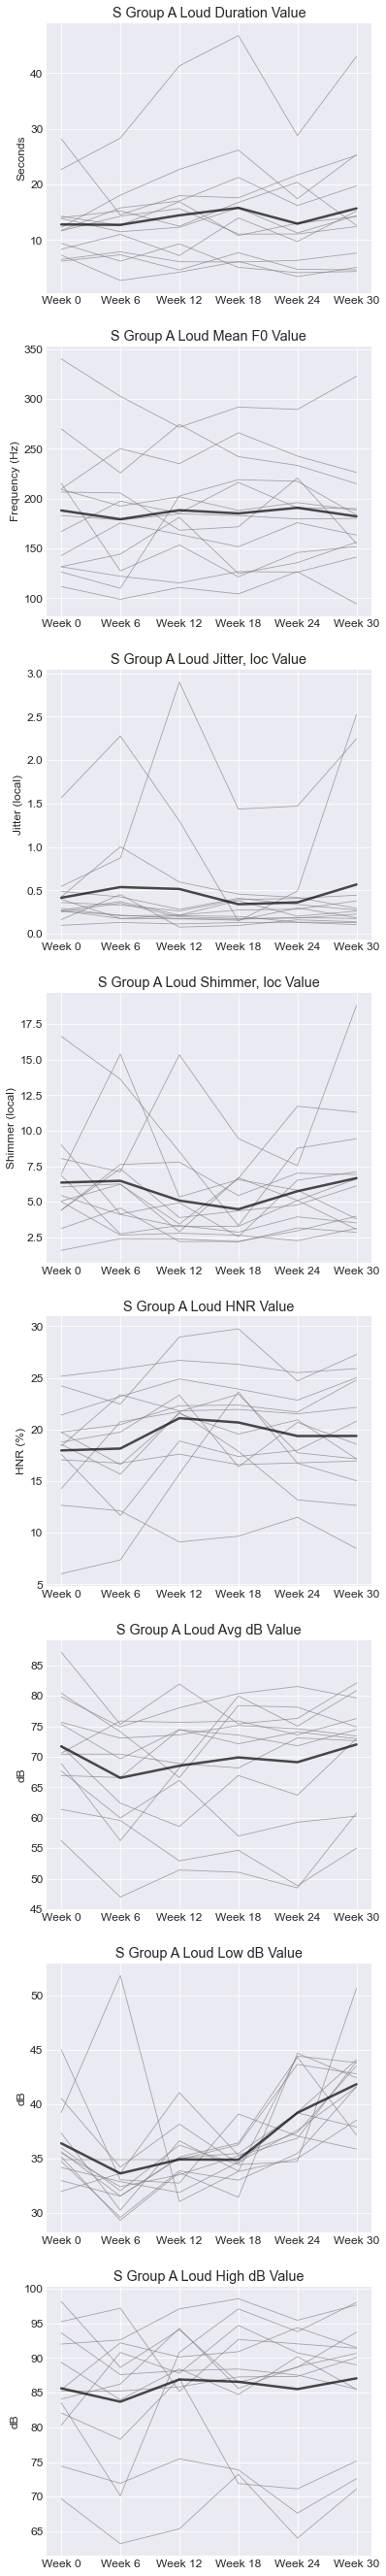

In [41]:
# Duration, Mean f0, Jitter, Shimer, HNR, Avg dB, Min dB, Max dB
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8)=plt.subplots(8,1,figsize=(6,48))
timepoints=['Week 0', 'Week 6', 'Week 12', 'Week 18', 'Week 24', 'Week 30']

# Dur
i=0
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='S'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=0.8, alpha=0.7, ax=ax1, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=2.5, alpha=0.7, ax=ax1, sort=False)

ax1.set_title('S Group '+meandflist[i].columns[0]+' Value')
ax1.set_ylabel('Seconds')
i+=1

# mf0
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='S'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=0.8, alpha=0.7, ax=ax2, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=2.5, alpha=0.7, ax=ax2, sort=False)

ax2.set_title('S Group '+meandflist[i].columns[0]+' Value')
ax2.set_ylabel('Frequency (Hz)')
i+=1

# jitter
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='S'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=0.8, alpha=0.7, ax=ax3, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=2.5, alpha=0.7, ax=ax3, sort=False)

ax3.set_title('S Group '+meandflist[i].columns[0]+' Value')
ax3.set_ylabel('Jitter (local)')
i+=1

# shimmer
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='S'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=0.8, alpha=0.7, ax=ax4, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=2.5, alpha=0.7, ax=ax4, sort=False)

ax4.set_title('S Group '+meandflist[i].columns[0]+' Value')
ax4.set_ylabel('Shimmer (local)')
i+=1

# HNR
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='S'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=0.8, alpha=0.7, ax=ax5, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=2.5, alpha=0.7, ax=ax5, sort=False)

ax5.set_title('S Group '+meandflist[i].columns[0]+' Value')
ax5.set_ylabel('HNR (%)')
i+=1

# avg db
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='S'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=0.8, alpha=0.7, ax=ax6, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=2.5, alpha=0.7, ax=ax6, sort=False)

ax6.set_title('S Group '+meandflist[i].columns[0]+' Value')
ax6.set_ylabel('dB')
i+=1

# min db
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='S'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=0.8, alpha=0.7, ax=ax7, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=2.5, alpha=0.7, ax=ax7, sort=False)

ax7.set_title('S Group '+meandflist[i].columns[0]+' Value')
ax7.set_ylabel('dB')
i+=1

# max db
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='S'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=0.8, alpha=0.7, ax=ax8, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=2.5, alpha=0.7, ax=ax8, sort=False)

ax8.set_title('S Group '+meandflist[i].columns[0]+' Value')
ax8.set_ylabel('dB')
i+=1

#plt.tight_layout(rect=[0, 0.03, 1, 0.97])
currentfig=plt.gcf()

In [42]:
currentfig.savefig(r'C:\Users\kevin\Documents\JHU\Research\Parkinsonics\Manuscript\Figures\SuppSpagh_A_08232022.pdf', format="pdf", bbox_inches="tight", dpi=150)

## A Loud D plots

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anacond

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anacond

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anacond

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anacond

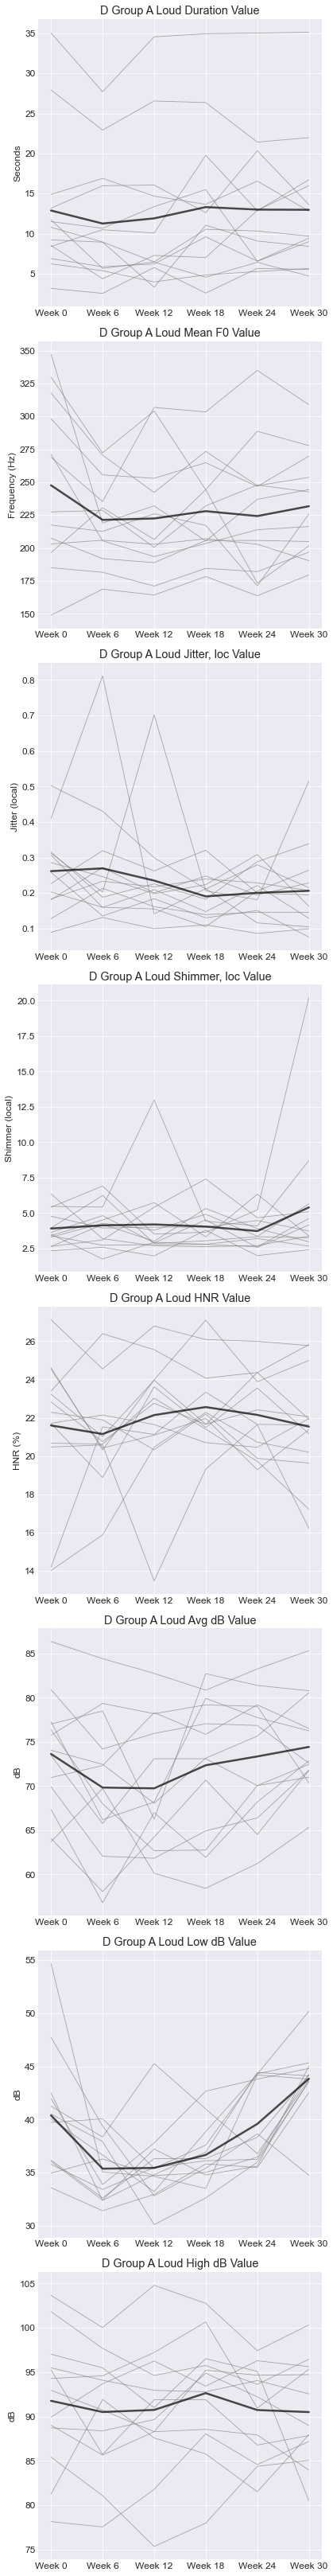

In [43]:
# Duration, Mean f0, Jitter, Shimer, HNR, Avg dB, Min dB, Max dB
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8)=plt.subplots(8,1,figsize=(6,48))

# Dur
i=0
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='D'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=0.8, alpha=0.7, ax=ax1, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=2.5, alpha=0.7, ax=ax1, sort=False)

ax1.set_title('D Group '+meandflist[i].columns[0]+' Value')
ax1.set_ylabel('Seconds')
i+=1

# mf0
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='D'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=0.8, alpha=0.7, ax=ax2, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=2.5, alpha=0.7, ax=ax2, sort=False)

ax2.set_title('D Group '+meandflist[i].columns[0]+' Value')
ax2.set_ylabel('Frequency (Hz)')
i+=1

# jitter
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='D'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=0.8, alpha=0.7, ax=ax3, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=2.5, alpha=0.7, ax=ax3, sort=False)

ax3.set_title('D Group '+meandflist[i].columns[0]+' Value')
ax3.set_ylabel('Jitter (local)')
i+=1

# shimmer
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='D'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=0.8, alpha=0.7, ax=ax4, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=2.5, alpha=0.7, ax=ax4, sort=False)

ax4.set_title('D Group '+meandflist[i].columns[0]+' Value')
ax4.set_ylabel('Shimmer (local)')
i+=1

# HNR
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='D'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=0.8, alpha=0.7, ax=ax5, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=2.5, alpha=0.7, ax=ax5, sort=False)

ax5.set_title('D Group '+meandflist[i].columns[0]+' Value')
ax5.set_ylabel('HNR (%)')
i+=1

# avg db
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='D'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=0.8, alpha=0.7, ax=ax6, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=2.5, alpha=0.7, ax=ax6, sort=False)

ax6.set_title('D Group '+meandflist[i].columns[0]+' Value')
ax6.set_ylabel('dB')
i+=1

# min db
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='D'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=0.8, alpha=0.7, ax=ax7, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=2.5, alpha=0.7, ax=ax7, sort=False)

ax7.set_title('D Group '+meandflist[i].columns[0]+' Value')
ax7.set_ylabel('dB')
i+=1

# max db
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='D'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=0.8, alpha=0.7, ax=ax8, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=2.5, alpha=0.7, ax=ax8, sort=False)

ax8.set_title('D Group '+meandflist[i].columns[0]+' Value')
ax8.set_ylabel('dB')
i+=1


plt.tight_layout(rect=[0, 0.03, 1, 0.97])
currentfig=plt.gcf()

In [44]:
currentfig.savefig(r'C:\Users\kevin\Documents\JHU\Research\Parkinsonics\Manuscript\Figures\SuppSpagh_B_08232021.pdf', format="pdf", bbox_inches="tight", dpi=150)

## A Speaking S plots

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anacond

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anacond

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anacond

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anacond

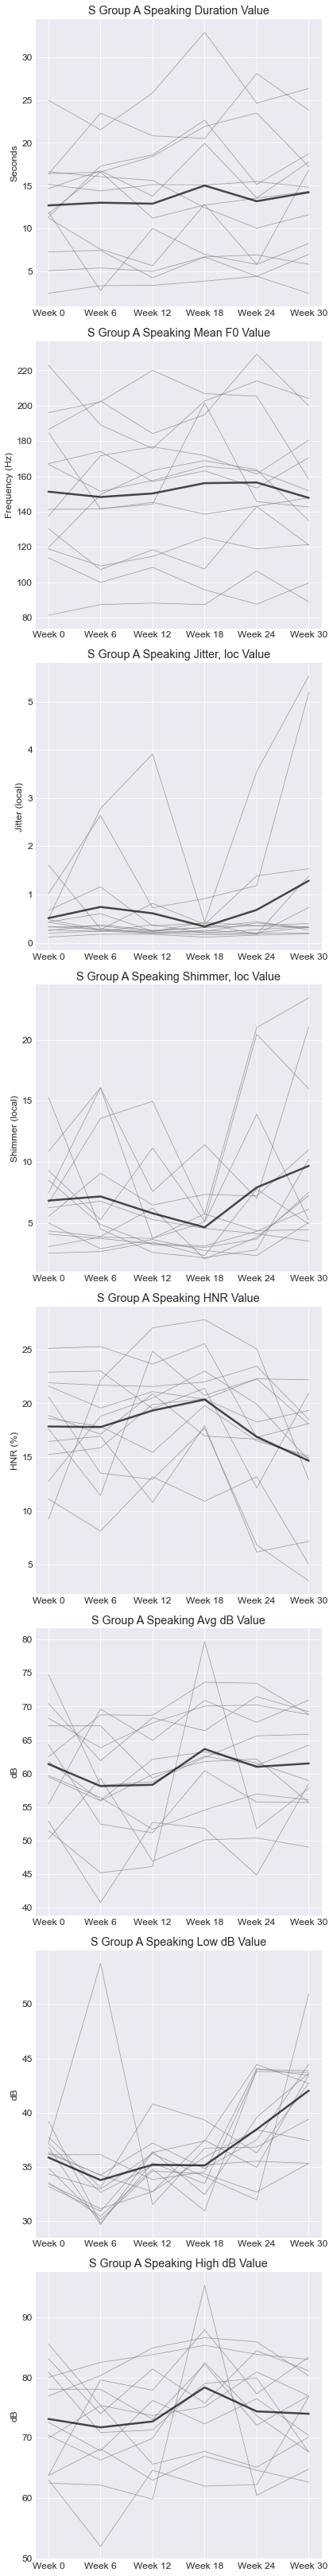

In [45]:
# Duration, Mean f0, Jitter, Shimer, HNR, Avg dB, Min dB, Max dB
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8)=plt.subplots(8,1,figsize=(6,48))

# Dur
i=8
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='S'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=0.8, alpha=0.7, ax=ax1, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=2.5, alpha=0.7, ax=ax1, sort=False)

ax1.set_title('S Group '+meandflist[i].columns[0]+' Value')
ax1.set_ylabel('Seconds')
i+=1

# mf0
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='S'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=0.8, alpha=0.7, ax=ax2, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=2.5, alpha=0.7, ax=ax2, sort=False)

ax2.set_title('S Group '+meandflist[i].columns[0]+' Value')
ax2.set_ylabel('Frequency (Hz)')
i+=1

# jitter
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='S'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=0.8, alpha=0.7, ax=ax3, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=2.5, alpha=0.7, ax=ax3, sort=False)

ax3.set_title('S Group '+meandflist[i].columns[0]+' Value')
ax3.set_ylabel('Jitter (local)')
i+=1

# shimmer
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='S'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=0.8, alpha=0.7, ax=ax4, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=2.5, alpha=0.7, ax=ax4, sort=False)

ax4.set_title('S Group '+meandflist[i].columns[0]+' Value')
ax4.set_ylabel('Shimmer (local)')
i+=1

# HNR
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='S'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=0.8, alpha=0.7, ax=ax5, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=2.5, alpha=0.7, ax=ax5, sort=False)

ax5.set_title('S Group '+meandflist[i].columns[0]+' Value')
ax5.set_ylabel('HNR (%)')
i+=1

# avg db
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='S'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=0.8, alpha=0.7, ax=ax6, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=2.5, alpha=0.7, ax=ax6, sort=False)

ax6.set_title('S Group '+meandflist[i].columns[0]+' Value')
ax6.set_ylabel('dB')
i+=1

# min db
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='S'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=0.8, alpha=0.7, ax=ax7, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=2.5, alpha=0.7, ax=ax7, sort=False)

ax7.set_title('S Group '+meandflist[i].columns[0]+' Value')
ax7.set_ylabel('dB')
i+=1

# max db
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='S'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=0.8, alpha=0.7, ax=ax8, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=2.5, alpha=0.7, ax=ax8, sort=False)

ax8.set_title('S Group '+meandflist[i].columns[0]+' Value')
ax8.set_ylabel('dB')
i+=1


plt.tight_layout(rect=[0, 0.03, 1, 0.97])
currentfig=plt.gcf()

In [46]:
currentfig.savefig(r'C:\Users\kevin\Documents\JHU\Research\Parkinsonics\Manuscript\Figures\SuppSpagh_C_08232022.pdf', format="pdf", bbox_inches="tight", dpi=150)

## A Speaking D plots

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anacond

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anacond

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anacond

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anacond

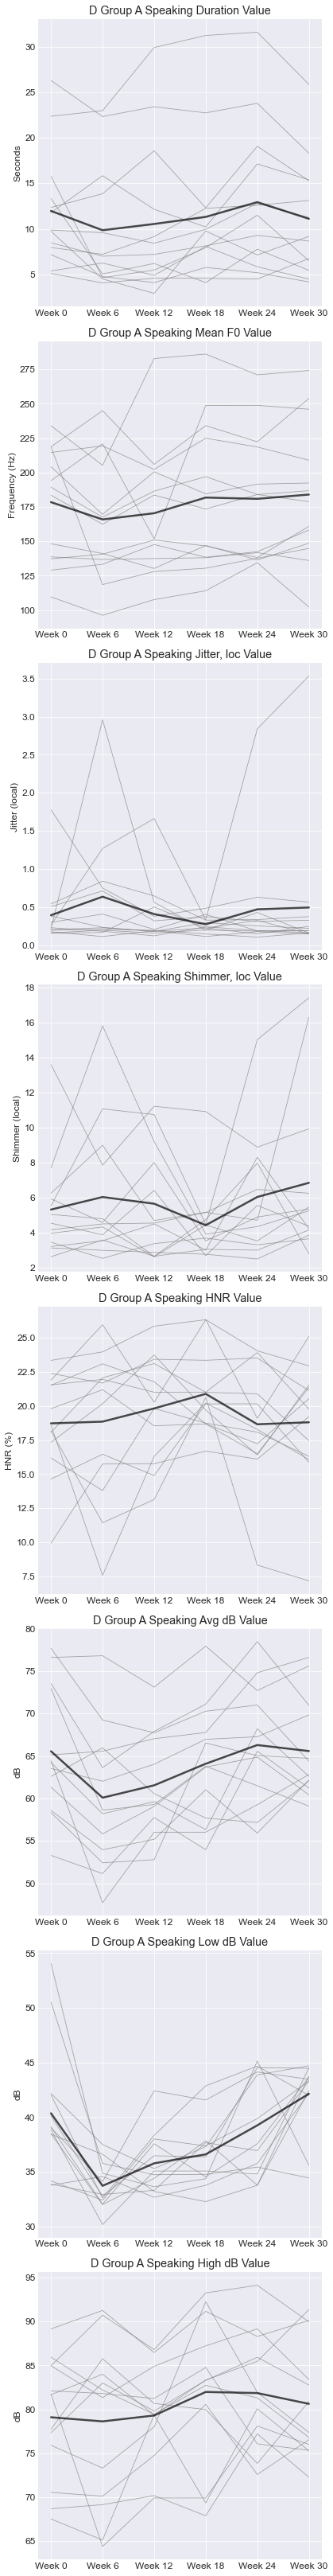

In [47]:
# Duration, Mean f0, Jitter, Shimer, HNR, Avg dB, Min dB, Max dB
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8)=plt.subplots(8,1,figsize=(6,48))

# Dur
i=8
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='D'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=0.8, alpha=0.7, ax=ax1, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=2.5, alpha=0.7, ax=ax1, sort=False)

ax1.set_title('D Group '+meandflist[i].columns[0]+' Value')
ax1.set_ylabel('Seconds')
i+=1

# mf0
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='D'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=0.8, alpha=0.7, ax=ax2, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=2.5, alpha=0.7, ax=ax2, sort=False)

ax2.set_title('D Group '+meandflist[i].columns[0]+' Value')
ax2.set_ylabel('Frequency (Hz)')
i+=1

# jitter
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='D'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=0.8, alpha=0.7, ax=ax3, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=2.5, alpha=0.7, ax=ax3, sort=False)

ax3.set_title('D Group '+meandflist[i].columns[0]+' Value')
ax3.set_ylabel('Jitter (local)')
i+=1

# shimmer
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='D'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=0.8, alpha=0.7, ax=ax4, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=2.5, alpha=0.7, ax=ax4, sort=False)

ax4.set_title('D Group '+meandflist[i].columns[0]+' Value')
ax4.set_ylabel('Shimmer (local)')
i+=1

# HNR
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='D'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=0.8, alpha=0.7, ax=ax5, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=2.5, alpha=0.7, ax=ax5, sort=False)

ax5.set_title('D Group '+meandflist[i].columns[0]+' Value')
ax5.set_ylabel('HNR (%)')
i+=1

# avg db
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='D'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=0.8, alpha=0.7, ax=ax6, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=2.5, alpha=0.7, ax=ax6, sort=False)

ax6.set_title('D Group '+meandflist[i].columns[0]+' Value')
ax6.set_ylabel('dB')
i+=1

# min db
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='D'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=0.8, alpha=0.7, ax=ax7, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=2.5, alpha=0.7, ax=ax7, sort=False)

ax7.set_title('D Group '+meandflist[i].columns[0]+' Value')
ax7.set_ylabel('dB')
i+=1

# max db
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='D'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=0.8, alpha=0.7, ax=ax8, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=2.5, alpha=0.7, ax=ax8, sort=False)

ax8.set_title('D Group '+meandflist[i].columns[0]+' Value')
ax8.set_ylabel('dB')
i+=1


plt.tight_layout(rect=[0, 0.03, 1, 0.97])
currentfig=plt.gcf()

In [48]:
currentfig.savefig(r'C:\Users\kevin\Documents\JHU\Research\Parkinsonics\Manuscript\Figures\SuppSpagh_D_08232022.pdf', format="pdf", bbox_inches="tight", dpi=150)

## E Loud S Plots

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anacond

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anacond

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anacond

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anacond

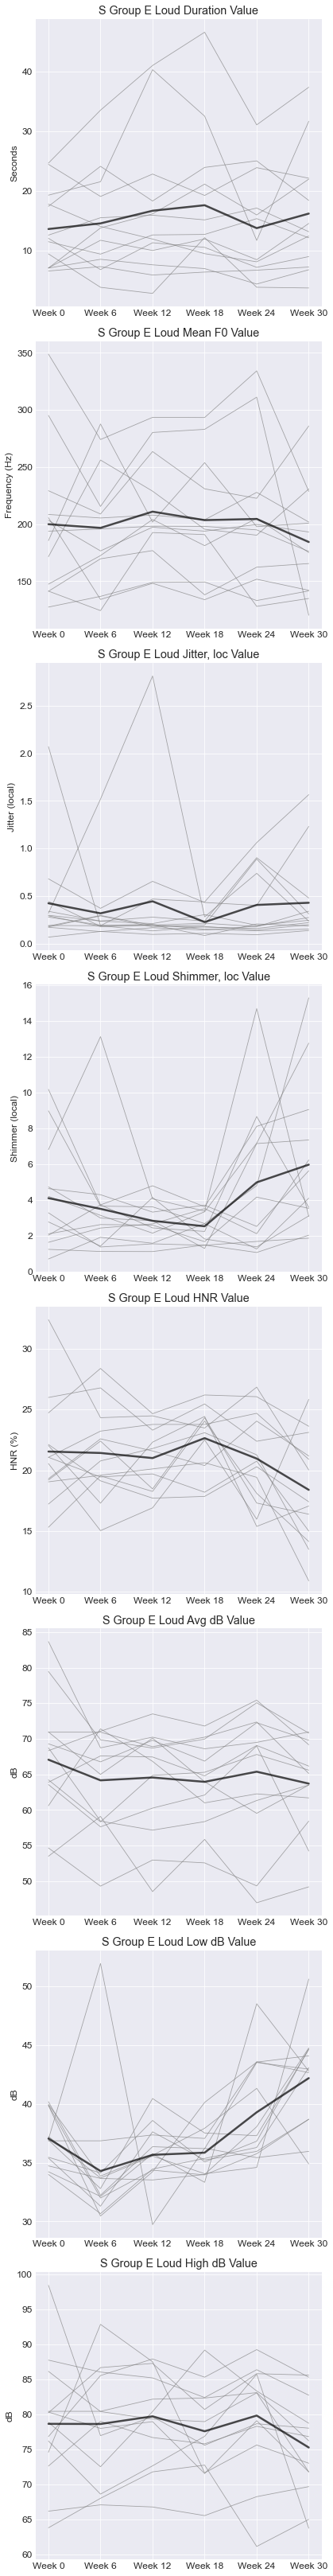

In [49]:
# Duration, Mean f0, Jitter, Shimer, HNR, Avg dB, Min dB, Max dB
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8)=plt.subplots(8,1,figsize=(6,48))

# Dur
i=16
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='S'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=0.8, alpha=0.7, ax=ax1, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=2.5, alpha=0.7, ax=ax1, sort=False)

ax1.set_title('S Group '+meandflist[i].columns[0]+' Value')
ax1.set_ylabel('Seconds')
i+=1

# mf0
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='S'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=0.8, alpha=0.7, ax=ax2, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=2.5, alpha=0.7, ax=ax2, sort=False)

ax2.set_title('S Group '+meandflist[i].columns[0]+' Value')
ax2.set_ylabel('Frequency (Hz)')
i+=1

# jitter
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='S'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=0.8, alpha=0.7, ax=ax3, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=2.5, alpha=0.7, ax=ax3, sort=False)

ax3.set_title('S Group '+meandflist[i].columns[0]+' Value')
ax3.set_ylabel('Jitter (local)')
i+=1

# shimmer
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='S'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=0.8, alpha=0.7, ax=ax4, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=2.5, alpha=0.7, ax=ax4, sort=False)

ax4.set_title('S Group '+meandflist[i].columns[0]+' Value')
ax4.set_ylabel('Shimmer (local)')
i+=1

# HNR
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='S'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=0.8, alpha=0.7, ax=ax5, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=2.5, alpha=0.7, ax=ax5, sort=False)

ax5.set_title('S Group '+meandflist[i].columns[0]+' Value')
ax5.set_ylabel('HNR (%)')
i+=1

# avg db
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='S'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=0.8, alpha=0.7, ax=ax6, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=2.5, alpha=0.7, ax=ax6, sort=False)

ax6.set_title('S Group '+meandflist[i].columns[0]+' Value')
ax6.set_ylabel('dB')
i+=1

# min db
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='S'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=0.8, alpha=0.7, ax=ax7, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=2.5, alpha=0.7, ax=ax7, sort=False)

ax7.set_title('S Group '+meandflist[i].columns[0]+' Value')
ax7.set_ylabel('dB')
i+=1

# max db
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='S'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=0.8, alpha=0.7, ax=ax8, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=2.5, alpha=0.7, ax=ax8, sort=False)

ax8.set_title('S Group '+meandflist[i].columns[0]+' Value')
ax8.set_ylabel('dB')
i+=1


plt.tight_layout(rect=[0, 0.03, 1, 0.97])
currentfig=plt.gcf()

In [50]:
currentfig.savefig(r'C:\Users\kevin\Documents\JHU\Research\Parkinsonics\Manuscript\Figures\SuppSpagh_E_08232022.pdf', format="pdf", bbox_inches="tight", dpi=150)

## E Loud D plots

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anacond

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anacond

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anacond

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anacond

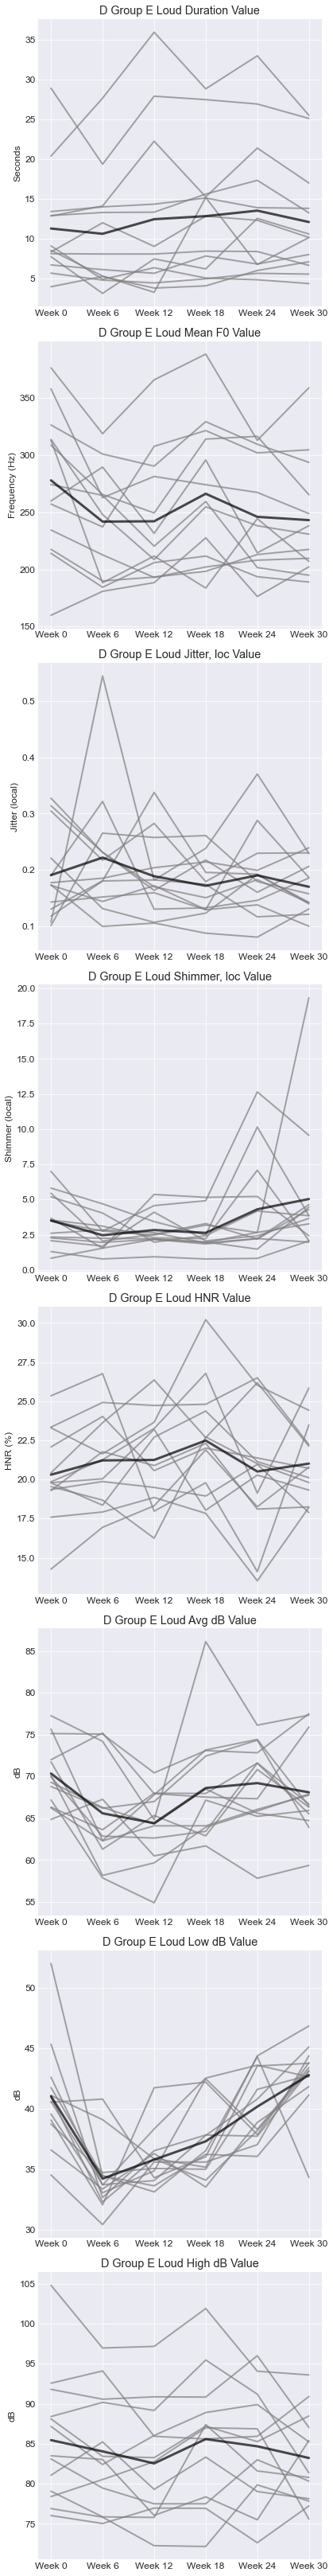

In [51]:
# Duration, Mean f0, Jitter, Shimer, HNR, Avg dB, Min dB, Max dB
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8)=plt.subplots(8,1,figsize=(6,48))

# Dur
i=16
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='D'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=2, alpha=0.7, ax=ax1, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=3, alpha=0.7, ax=ax1, sort=False)

ax1.set_title('D Group '+meandflist[i].columns[0]+' Value')
ax1.set_ylabel('Seconds')
i+=1

# mf0
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='D'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=2, alpha=0.7, ax=ax2, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=3, alpha=0.7, ax=ax2, sort=False)

ax2.set_title('D Group '+meandflist[i].columns[0]+' Value')
ax2.set_ylabel('Frequency (Hz)')
i+=1

# jitter
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='D'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=2, alpha=0.7, ax=ax3, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=3, alpha=0.7, ax=ax3, sort=False)

ax3.set_title('D Group '+meandflist[i].columns[0]+' Value')
ax3.set_ylabel('Jitter (local)')
i+=1

# shimmer
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='D'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=2, alpha=0.7, ax=ax4, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=3, alpha=0.7, ax=ax4, sort=False)

ax4.set_title('D Group '+meandflist[i].columns[0]+' Value')
ax4.set_ylabel('Shimmer (local)')
i+=1

# HNR
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='D'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=2, alpha=0.7, ax=ax5, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=3, alpha=0.7, ax=ax5, sort=False)

ax5.set_title('D Group '+meandflist[i].columns[0]+' Value')
ax5.set_ylabel('HNR (%)')
i+=1

# avg db
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='D'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=2, alpha=0.7, ax=ax6, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=3, alpha=0.7, ax=ax6, sort=False)

ax6.set_title('D Group '+meandflist[i].columns[0]+' Value')
ax6.set_ylabel('dB')
i+=1

# min db
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='D'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=2, alpha=0.7, ax=ax7, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=3, alpha=0.7, ax=ax7, sort=False)

ax7.set_title('D Group '+meandflist[i].columns[0]+' Value')
ax7.set_ylabel('dB')
i+=1

# max db
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='D'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=2, alpha=0.7, ax=ax8, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=3, alpha=0.7, ax=ax8, sort=False)

ax8.set_title('D Group '+meandflist[i].columns[0]+' Value')
ax8.set_ylabel('dB')
i+=1


plt.tight_layout(rect=[0, 0.03, 1, 0.97])
currentfig=plt.gcf()

In [52]:
currentfig.savefig(r'C:\Users\kevin\Documents\JHU\Research\Parkinsonics\Manuscript\Figures\SuppSpagh_F_08232022.pdf', format="pdf", bbox_inches="tight", dpi=150)

## E Speaking S Plots

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anacond

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anacond

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anacond

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anacond

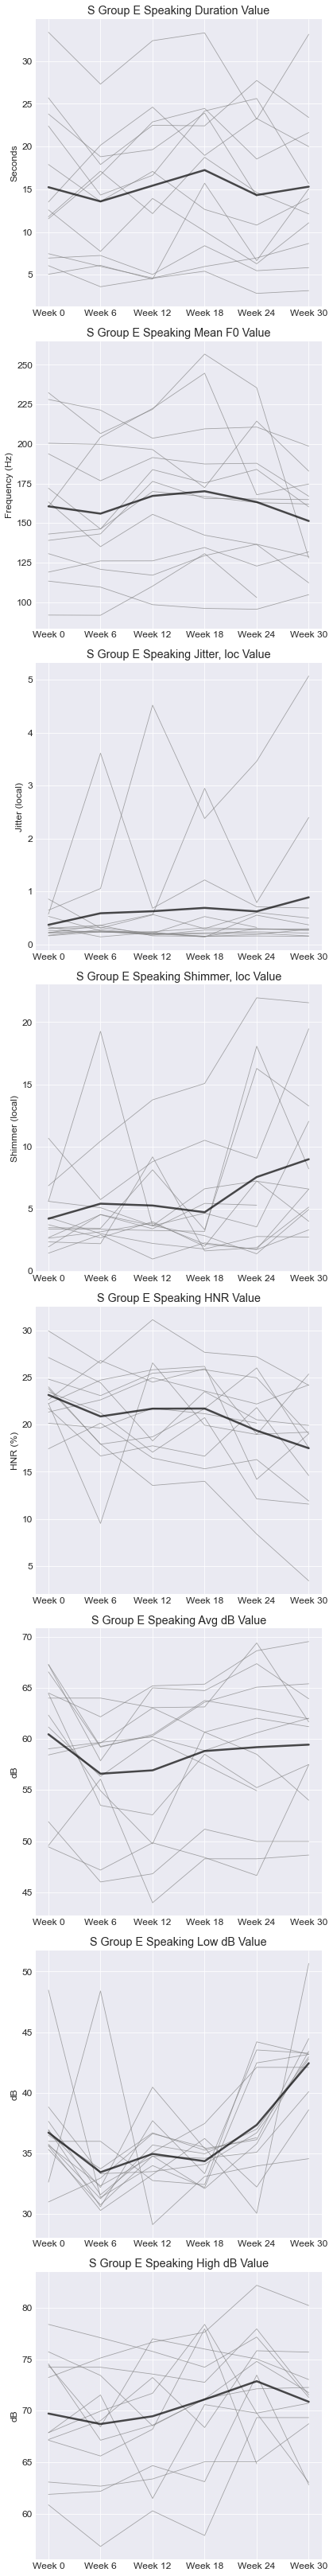

In [53]:
# Duration, Mean f0, Jitter, Shimer, HNR, Avg dB, Min dB, Max dB
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8)=plt.subplots(8,1,figsize=(6,48))

# Dur
i=24
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='S'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=0.8, alpha=0.7, ax=ax1, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=2.5, alpha=0.7, ax=ax1, sort=False)

ax1.set_title('S Group '+meandflist[i].columns[0]+' Value')
ax1.set_ylabel('Seconds')
i+=1

# mf0
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='S'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=0.8, alpha=0.7, ax=ax2, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=2.5, alpha=0.7, ax=ax2, sort=False)

ax2.set_title('S Group '+meandflist[i].columns[0]+' Value')
ax2.set_ylabel('Frequency (Hz)')
i+=1

# jitter
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='S'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=0.8, alpha=0.7, ax=ax3, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=2.5, alpha=0.7, ax=ax3, sort=False)

ax3.set_title('S Group '+meandflist[i].columns[0]+' Value')
ax3.set_ylabel('Jitter (local)')
i+=1

# shimmer
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='S'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=0.8, alpha=0.7, ax=ax4, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=2.5, alpha=0.7, ax=ax4, sort=False)

ax4.set_title('S Group '+meandflist[i].columns[0]+' Value')
ax4.set_ylabel('Shimmer (local)')
i+=1

# HNR
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='S'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=0.8, alpha=0.7, ax=ax5, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=2.5, alpha=0.7, ax=ax5, sort=False)

ax5.set_title('S Group '+meandflist[i].columns[0]+' Value')
ax5.set_ylabel('HNR (%)')
i+=1

# avg db
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='S'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=0.8, alpha=0.7, ax=ax6, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=2.5, alpha=0.7, ax=ax6, sort=False)

ax6.set_title('S Group '+meandflist[i].columns[0]+' Value')
ax6.set_ylabel('dB')
i+=1

# min db
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='S'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=0.8, alpha=0.7, ax=ax7, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=2.5, alpha=0.7, ax=ax7, sort=False)

ax7.set_title('S Group '+meandflist[i].columns[0]+' Value')
ax7.set_ylabel('dB')
i+=1

# max db
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='S'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=0.8, alpha=0.7, ax=ax8, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=2.5, alpha=0.7, ax=ax8, sort=False)

ax8.set_title('S Group '+meandflist[i].columns[0]+' Value')
ax8.set_ylabel('dB')
i+=1


plt.tight_layout(rect=[0, 0.03, 1, 0.97])
currentfig=plt.gcf()

In [54]:
currentfig.savefig(r'C:\Users\kevin\Documents\JHU\Research\Parkinsonics\Manuscript\Figures\SuppSpagh_G_08232022.pdf', format="pdf", bbox_inches="tight", dpi=150)

## E Speaking D Plots

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anacond

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anacond

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anacond

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anacond

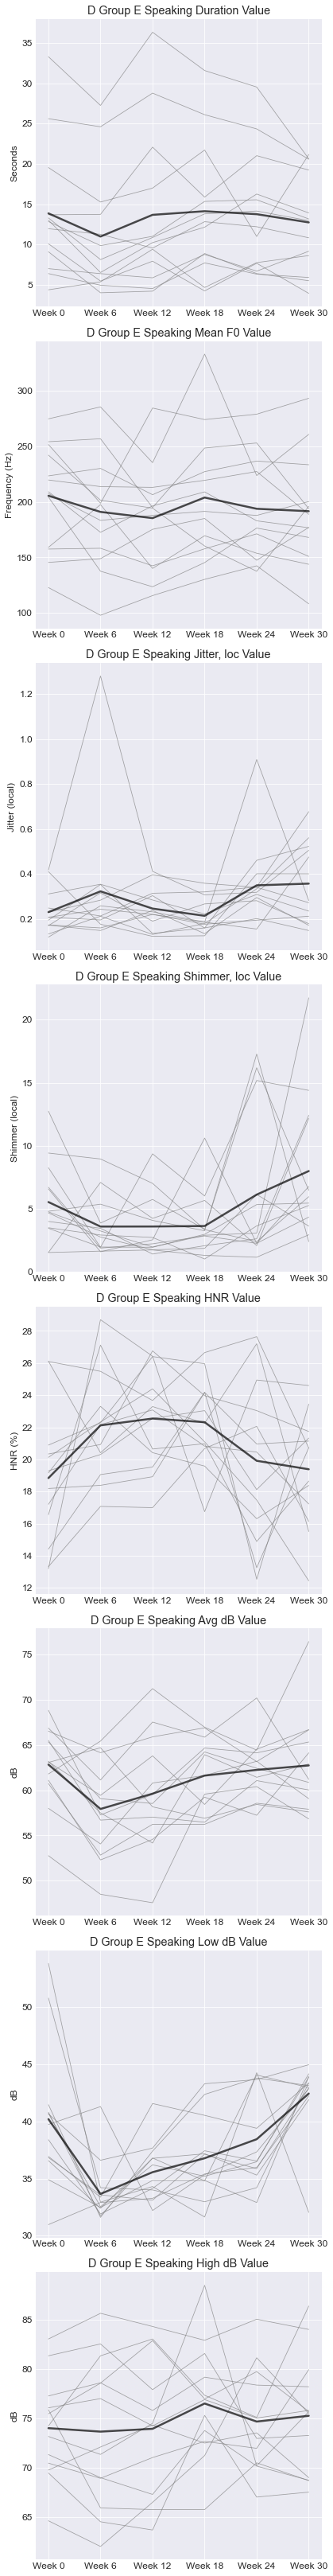

In [55]:
# Duration, Mean f0, Jitter, Shimer, HNR, Avg dB, Min dB, Max dB
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8)=plt.subplots(8,1,figsize=(6,48))

# Dur
i=24
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='D'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=0.8, alpha=0.7, ax=ax1, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=2.5, alpha=0.7, ax=ax1, sort=False)

ax1.set_title('D Group '+meandflist[i].columns[0]+' Value')
ax1.set_ylabel('Seconds')
i+=1

# mf0
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='D'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=0.8, alpha=0.7, ax=ax2, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=2.5, alpha=0.7, ax=ax2, sort=False)

ax2.set_title('D Group '+meandflist[i].columns[0]+' Value')
ax2.set_ylabel('Frequency (Hz)')
i+=1

# jitter
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='D'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=0.8, alpha=0.7, ax=ax3, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=2.5, alpha=0.7, ax=ax3, sort=False)

ax3.set_title('D Group '+meandflist[i].columns[0]+' Value')
ax3.set_ylabel('Jitter (local)')
i+=1

# shimmer
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='D'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=0.8, alpha=0.7, ax=ax4, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=2.5, alpha=0.7, ax=ax4, sort=False)

ax4.set_title('D Group '+meandflist[i].columns[0]+' Value')
ax4.set_ylabel('Shimmer (local)')
i+=1

# HNR
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='D'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=0.8, alpha=0.7, ax=ax5, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=2.5, alpha=0.7, ax=ax5, sort=False)

ax5.set_title('D Group '+meandflist[i].columns[0]+' Value')
ax5.set_ylabel('HNR (%)')
i+=1

# avg db
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='D'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=0.8, alpha=0.7, ax=ax6, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=2.5, alpha=0.7, ax=ax6, sort=False)

ax6.set_title('D Group '+meandflist[i].columns[0]+' Value')
ax6.set_ylabel('dB')
i+=1

# min db
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='D'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=0.8, alpha=0.7, ax=ax7, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=2.5, alpha=0.7, ax=ax7, sort=False)

ax7.set_title('D Group '+meandflist[i].columns[0]+' Value')
ax7.set_ylabel('dB')
i+=1

# max db
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='D'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=0.8, alpha=0.7, ax=ax8, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=2.5, alpha=0.7, ax=ax8, sort=False)

ax8.set_title('D Group '+meandflist[i].columns[0]+' Value')
ax8.set_ylabel('dB')
i+=1


plt.tight_layout(rect=[0, 0.03, 1, 0.97])
currentfig=plt.gcf()

In [56]:
currentfig.savefig(r'C:\Users\kevin\Documents\JHU\Research\Parkinsonics\Manuscript\Figures\SuppSpagh_H_08232022.pdf', format="pdf", bbox_inches="tight", dpi=150)

## Rainbow S plots

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anacond

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anacond

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anacond

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anacond

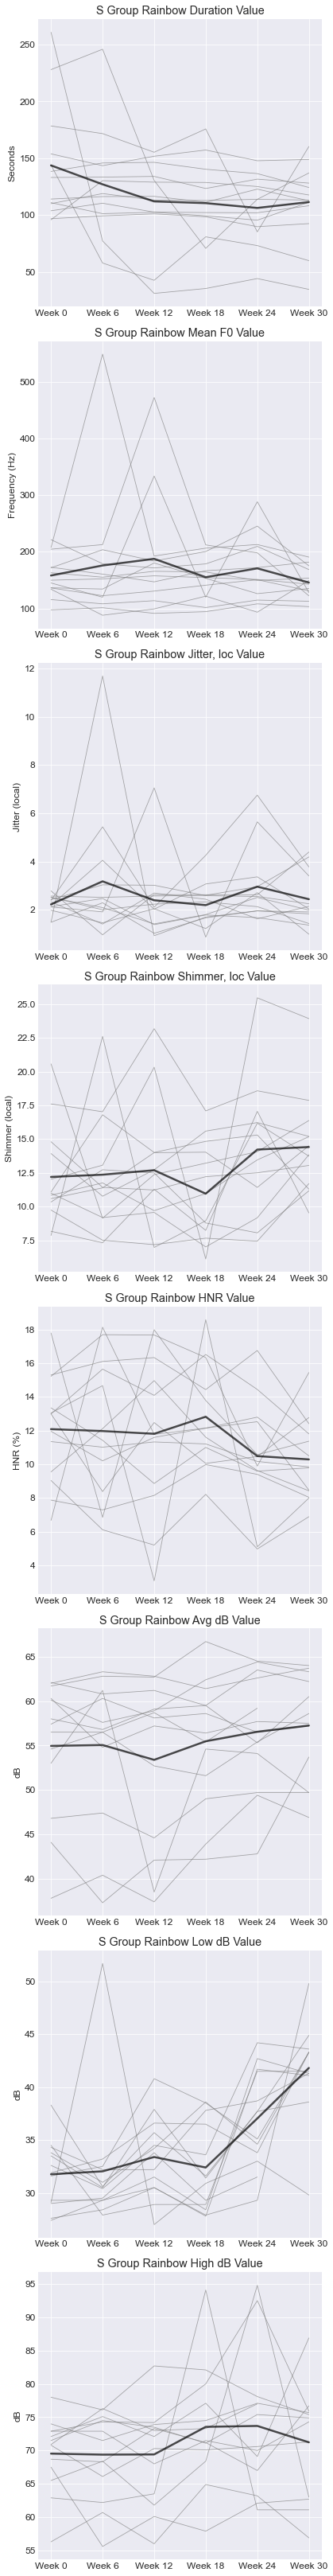

In [57]:
# Duration, Mean f0, Jitter, Shimer, HNR, Avg dB, Min dB, Max dB
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8)=plt.subplots(8,1,figsize=(6,48))

# Dur
i=32
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='S'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=0.8, alpha=0.7, ax=ax1, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=2.5, alpha=0.7, ax=ax1, sort=False)

ax1.set_title('S Group '+meandflist[i].columns[0]+' Value')
ax1.set_ylabel('Seconds')
i+=1

# mf0
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='S'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=0.8, alpha=0.7, ax=ax2, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=2.5, alpha=0.7, ax=ax2, sort=False)

ax2.set_title('S Group '+meandflist[i].columns[0]+' Value')
ax2.set_ylabel('Frequency (Hz)')
i+=1

# jitter
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='S'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=0.8, alpha=0.7, ax=ax3, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=2.5, alpha=0.7, ax=ax3, sort=False)

ax3.set_title('S Group '+meandflist[i].columns[0]+' Value')
ax3.set_ylabel('Jitter (local)')
i+=1

# shimmer
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='S'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=0.8, alpha=0.7, ax=ax4, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=2.5, alpha=0.7, ax=ax4, sort=False)

ax4.set_title('S Group '+meandflist[i].columns[0]+' Value')
ax4.set_ylabel('Shimmer (local)')
i+=1

# HNR
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='S'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=0.8, alpha=0.7, ax=ax5, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=2.5, alpha=0.7, ax=ax5, sort=False)

ax5.set_title('S Group '+meandflist[i].columns[0]+' Value')
ax5.set_ylabel('HNR (%)')
i+=1

# avg db
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='S'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=0.8, alpha=0.7, ax=ax6, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=2.5, alpha=0.7, ax=ax6, sort=False)

ax6.set_title('S Group '+meandflist[i].columns[0]+' Value')
ax6.set_ylabel('dB')
i+=1

# min db
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='S'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=0.8, alpha=0.7, ax=ax7, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=2.5, alpha=0.7, ax=ax7, sort=False)

ax7.set_title('S Group '+meandflist[i].columns[0]+' Value')
ax7.set_ylabel('dB')
i+=1

# max db
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='S'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=0.8, alpha=0.7, ax=ax8, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=2.5, alpha=0.7, ax=ax8, sort=False)

ax8.set_title('S Group '+meandflist[i].columns[0]+' Value')
ax8.set_ylabel('dB')
i+=1


plt.tight_layout(rect=[0, 0.03, 1, 0.97])
currentfig=plt.gcf()

In [58]:
currentfig.savefig(r'C:\Users\kevin\Documents\JHU\Research\Parkinsonics\Manuscript\Figures\SuppSpagh_I_08232022.pdf', format="pdf", bbox_inches="tight", dpi=150)

## Rainbow D plots

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anacond

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anacond

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anacond

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anacond

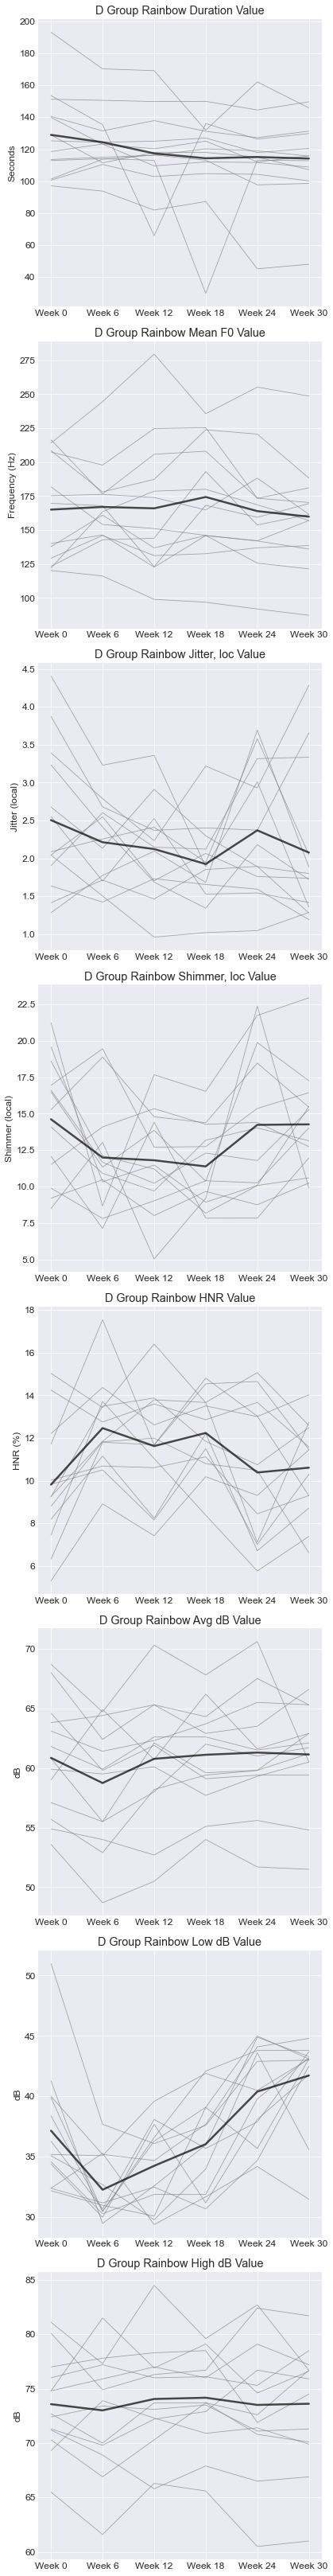

In [59]:
# Duration, Mean f0, Jitter, Shimer, HNR, Avg dB, Min dB, Max dB
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8)=plt.subplots(8,1,figsize=(6,48))

# Dur
i=32
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='D'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=0.8, alpha=0.7, ax=ax1, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=2.5, alpha=0.7, ax=ax1, sort=False)

ax1.set_title('D Group '+meandflist[i].columns[0]+' Value')
ax1.set_ylabel('Seconds')
i+=1

# mf0
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='D'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=0.8, alpha=0.7, ax=ax2, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=2.5, alpha=0.7, ax=ax2, sort=False)

ax2.set_title('D Group '+meandflist[i].columns[0]+' Value')
ax2.set_ylabel('Frequency (Hz)')
i+=1

# jitter
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='D'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=0.8, alpha=0.7, ax=ax3, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=2.5, alpha=0.7, ax=ax3, sort=False)

ax3.set_title('D Group '+meandflist[i].columns[0]+' Value')
ax3.set_ylabel('Jitter (local)')
i+=1

# shimmer
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='D'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=0.8, alpha=0.7, ax=ax4, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=2.5, alpha=0.7, ax=ax4, sort=False)

ax4.set_title('D Group '+meandflist[i].columns[0]+' Value')
ax4.set_ylabel('Shimmer (local)')
i+=1

# HNR
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='D'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=0.8, alpha=0.7, ax=ax5, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=2.5, alpha=0.7, ax=ax5, sort=False)

ax5.set_title('D Group '+meandflist[i].columns[0]+' Value')
ax5.set_ylabel('HNR (%)')
i+=1

# avg db
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='D'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=0.8, alpha=0.7, ax=ax6, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=2.5, alpha=0.7, ax=ax6, sort=False)

ax6.set_title('D Group '+meandflist[i].columns[0]+' Value')
ax6.set_ylabel('dB')
i+=1

# min db
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='D'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=0.8, alpha=0.7, ax=ax7, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=2.5, alpha=0.7, ax=ax7, sort=False)

ax7.set_title('D Group '+meandflist[i].columns[0]+' Value')
ax7.set_ylabel('dB')
i+=1

# max db
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='D'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=0.8, alpha=0.7, ax=ax8, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=2.5, alpha=0.7, ax=ax8, sort=False)

ax8.set_title('D Group '+meandflist[i].columns[0]+' Value')
ax8.set_ylabel('dB')
i+=1


plt.tight_layout(rect=[0, 0.03, 1, 0.97])
currentfig=plt.gcf()

In [60]:
currentfig.savefig(r'C:\Users\kevin\Documents\JHU\Research\Parkinsonics\Manuscript\Figures\SuppSpagh_J_08232023.pdf', format="pdf", bbox_inches="tight", dpi=150)

## Cookie S plots

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anacond

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anacond

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anacond

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anacond

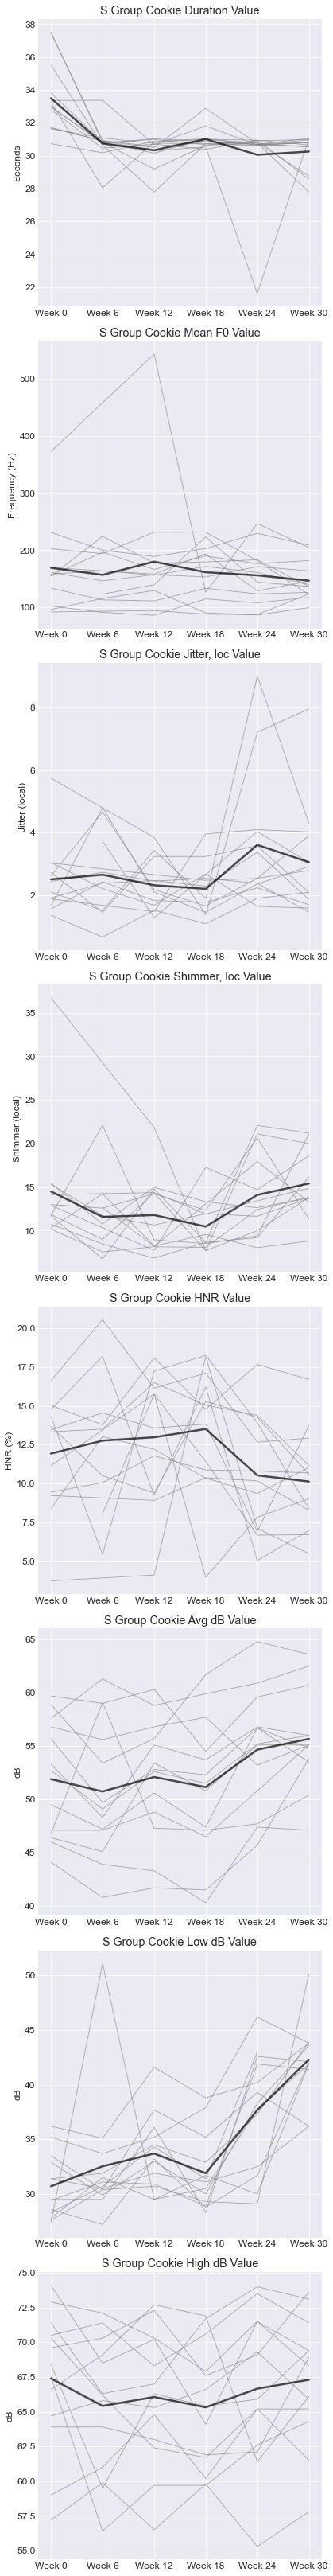

In [61]:
# Duration, Mean f0, Jitter, Shimer, HNR, Avg dB, Min dB, Max dB
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8)=plt.subplots(8,1,figsize=(6,48))

# Dur
i=40
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='S'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=0.8, alpha=0.7, ax=ax1, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=2.5, alpha=0.7, ax=ax1, sort=False)

ax1.set_title('S Group '+meandflist[i].columns[0]+' Value')
ax1.set_ylabel('Seconds')
i+=1

# mf0
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='S'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=0.8, alpha=0.7, ax=ax2, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=2.5, alpha=0.7, ax=ax2, sort=False)

ax2.set_title('S Group '+meandflist[i].columns[0]+' Value')
ax2.set_ylabel('Frequency (Hz)')
i+=1

# jitter
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='S'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=0.8, alpha=0.7, ax=ax3, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=2.5, alpha=0.7, ax=ax3, sort=False)

ax3.set_title('S Group '+meandflist[i].columns[0]+' Value')
ax3.set_ylabel('Jitter (local)')
i+=1

# shimmer
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='S'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=0.8, alpha=0.7, ax=ax4, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=2.5, alpha=0.7, ax=ax4, sort=False)

ax4.set_title('S Group '+meandflist[i].columns[0]+' Value')
ax4.set_ylabel('Shimmer (local)')
i+=1

# HNR
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='S'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=0.8, alpha=0.7, ax=ax5, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=2.5, alpha=0.7, ax=ax5, sort=False)

ax5.set_title('S Group '+meandflist[i].columns[0]+' Value')
ax5.set_ylabel('HNR (%)')
i+=1

# avg db
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='S'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=0.8, alpha=0.7, ax=ax6, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=2.5, alpha=0.7, ax=ax6, sort=False)

ax6.set_title('S Group '+meandflist[i].columns[0]+' Value')
ax6.set_ylabel('dB')
i+=1

# min db
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='S'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=0.8, alpha=0.7, ax=ax7, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=2.5, alpha=0.7, ax=ax7, sort=False)

ax7.set_title('S Group '+meandflist[i].columns[0]+' Value')
ax7.set_ylabel('dB')
i+=1

# max db
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='S'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=0.8, alpha=0.7, ax=ax8, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=2.5, alpha=0.7, ax=ax8, sort=False)

ax8.set_title('S Group '+meandflist[i].columns[0]+' Value')
ax8.set_ylabel('dB')
i+=1


plt.tight_layout(rect=[0, 0.03, 1, 0.97])
currentfig=plt.gcf()

In [62]:
currentfig.savefig(r'C:\Users\kevin\Documents\JHU\Research\Parkinsonics\Manuscript\Figures\SuppSpagh_K_08232022.pdf', format="pdf", bbox_inches="tight", dpi=150)

## Cookie D plots

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anacond

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anacond

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anacond

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anacond

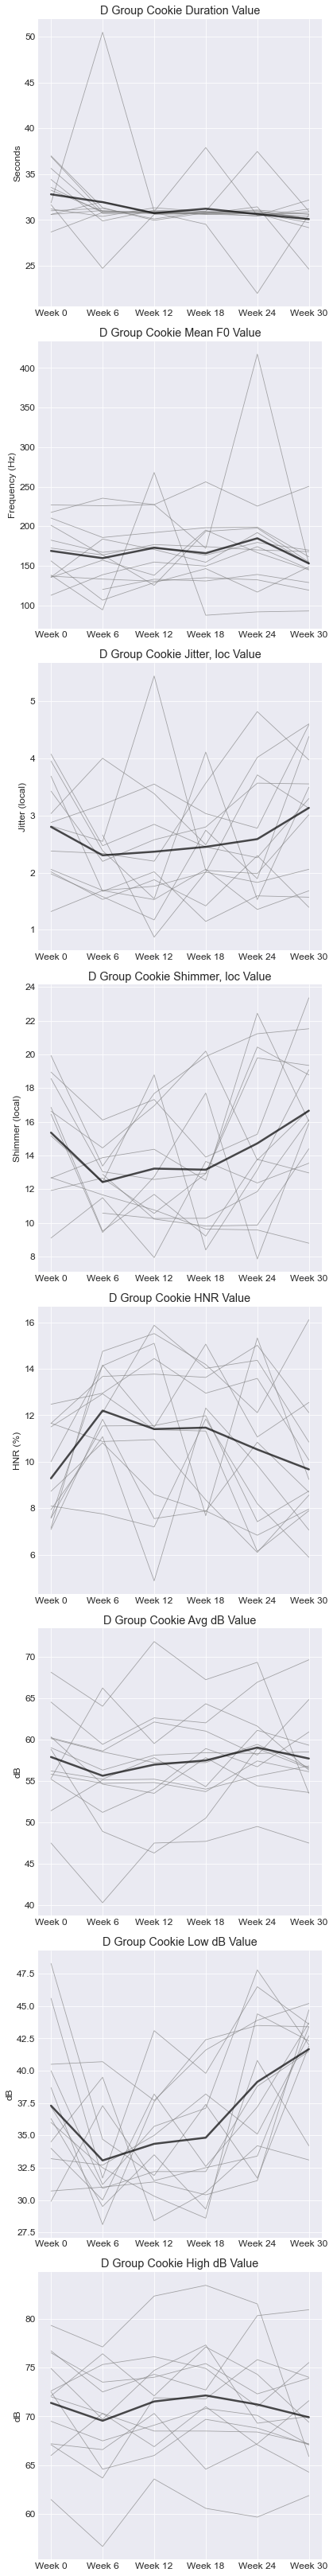

In [63]:
# Duration, Mean f0, Jitter, Shimer, HNR, Avg dB, Min dB, Max dB
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8)=plt.subplots(8,1,figsize=(6,48))

# Dur
i=40
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='D'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=0.8, alpha=0.7, ax=ax1, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=2.5, alpha=0.7, ax=ax1, sort=False)

ax1.set_title('D Group '+meandflist[i].columns[0]+' Value')
ax1.set_ylabel('Seconds')
i+=1

# mf0
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='D'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=0.8, alpha=0.7, ax=ax2, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=2.5, alpha=0.7, ax=ax2, sort=False)

ax2.set_title('D Group '+meandflist[i].columns[0]+' Value')
ax2.set_ylabel('Frequency (Hz)')
i+=1

# jitter
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='D'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=0.8, alpha=0.7, ax=ax3, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=2.5, alpha=0.7, ax=ax3, sort=False)

ax3.set_title('D Group '+meandflist[i].columns[0]+' Value')
ax3.set_ylabel('Jitter (local)')
i+=1

# shimmer
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='D'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=0.8, alpha=0.7, ax=ax4, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=2.5, alpha=0.7, ax=ax4, sort=False)

ax4.set_title('D Group '+meandflist[i].columns[0]+' Value')
ax4.set_ylabel('Shimmer (local)')
i+=1

# HNR
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='D'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=0.8, alpha=0.7, ax=ax5, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=2.5, alpha=0.7, ax=ax5, sort=False)

ax5.set_title('D Group '+meandflist[i].columns[0]+' Value')
ax5.set_ylabel('HNR (%)')
i+=1

# avg db
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='D'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=0.8, alpha=0.7, ax=ax6, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=2.5, alpha=0.7, ax=ax6, sort=False)

ax6.set_title('D Group '+meandflist[i].columns[0]+' Value')
ax6.set_ylabel('dB')
i+=1

# min db
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='D'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=0.8, alpha=0.7, ax=ax7, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=2.5, alpha=0.7, ax=ax7, sort=False)

ax7.set_title('D Group '+meandflist[i].columns[0]+' Value')
ax7.set_ylabel('dB')
i+=1

# max db
temp=meandflist[i].loc[meandflist[i]['First Intervention']=='D'].iloc[:, 2:8]
temp_avg=temp.mean(axis=0)

for patient in range(13):
    plot=temp.iloc[patient]
    sns.lineplot(timepoints, plot, marker='', color='grey', linewidth=0.8, alpha=0.7, ax=ax8, sort=False)
sns.lineplot(timepoints, temp_avg, marker='', color='black', linewidth=2.5, alpha=0.7, ax=ax8, sort=False)

ax8.set_title('D Group '+meandflist[i].columns[0]+' Value')
ax8.set_ylabel('dB')
i+=1


plt.tight_layout(rect=[0, 0.03, 1, 0.97])
currentfig=plt.gcf()

In [64]:
currentfig.savefig(r'C:\Users\kevin\Documents\JHU\Research\Parkinsonics\Manuscript\Figures\SuppSpagh_L_08232022.pdf', format="pdf", bbox_inches="tight", dpi=150)